In [51]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [7]:
import importlib

list_versioned = []
libraries = ['pandas','seaborn','numpy','matplotlib','scipy','sklearn','hyperopt','xgboost','lightgbm','category_encoders','optuna']

for lib in libraries:
    try:
        module=importlib.import_module(lib)
        version=module.__version__
    except AttributeError:
        version='Unkown version'

    list_versioned.append(f'{lib}=={version}')
print(list_versioned)

['pandas==2.1.4', 'seaborn==0.13.1', 'numpy==1.26.3', 'matplotlib==3.8.2', 'scipy==1.11.4', 'sklearn==1.5.1', 'hyperopt==0.2.7', 'xgboost==2.0.3', 'lightgbm==4.3.0', 'category_encoders==2.6.3', 'optuna==3.6.1']


In [52]:
# objective
# the dataset contains information regarding product purchase made specifically through two types of devices laptops and mobiles each having its own login
# requisites.
# two seperate models are to be built to make predictions for two different types of consumers 

In [53]:
data=pd.read_csv('Social+Media+data+for+DSBA (2).csv')

In [54]:
data.sample(10)

,UserID,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
1528,1001529,No,232.0,iOS and Android,22925.0,1,4,Financial,48.0,5915,3,No,22,Yes,4,1,10
1177,1001178,No,375.0,iOS and Android,28455.0,17,5,Financial,50.0,13269,5,No,15,No,3,3,19
7747,1007748,No,197.0,Tab,31195.0,4,2,Beach,105.0,4499,1,Yes,17,No,2,0,5
10530,1010531,No,304.0,Tab,50144.0,1,4,Historical site,115.0,2280,8,No,24,No,3,3,10
11318,1011319,No,321.0,Tab,44951.0,5,5,Historical site,111.0,2185,3,Yes,35,No,1,0,9
4274,1004275,No,204.0,iOS,39617.0,15,3,Financial,92.0,4829,1,NaN,26,No,4,1,14
8333,1008334,No,260.0,Tab,14151.0,2,4,Trekking,110.0,6697,1,No,14,No,4,0,14
9961,1009962,No,233.0,Tab,8477.0,7,3,Historical site,67.0,2197,2,No,25,No,2,1,11
6705,1006706,No,221.0,Tab,25137.0,8,1,Historical site,90.0,5063,1,Yes,24,No,3,1,10
7872,1007873,No,288.0,Tab,42887.0,10,2,Beach,86.0,4691,3,No,25,No,1,0,4


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   UserID                                        11760 non-null  int64  
 1   Taken_product                                 11760 non-null  object 
 2   Yearly_avg_view_on_travel_page                11179 non-null  float64
 3   preferred_device                              11707 non-null  object 
 4   total_likes_on_outstation_checkin_given       11379 non-null  float64
 5   yearly_avg_Outstation_checkins                11685 non-null  object 
 6   member_in_family                              11760 non-null  object 
 7   preferred_location_type                       11729 non-null  object 
 8   Yearly_avg_comment_on_travel_page             11554 non-null  float64
 9   total_likes_on_outofstation_checkin_received  11760 non-null 

In [56]:
data.describe()

,UserID,Yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,montly_avg_comment_on_company_page,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
count,1.176000e+04,11179.000000,11379.000000,11554.000000,11760.000000,11760.000000,11760.000000,11760.000000,11760.000000,11760.000000
mean,1.005880e+06,280.830844,28170.481765,74.790029,6531.699065,3.203571,28.661565,2.712245,0.793878,13.817432
std,3.394964e+03,68.182958,14385.032134,24.026650,4706.613785,2.616365,48.660504,1.080887,0.851823,9.070657
min,1.000001e+06,35.000000,3570.000000,3.000000,1009.000000,0.000000,11.000000,1.000000,0.000000,0.000000
25%,1.002941e+06,232.000000,16380.000000,57.000000,2940.750000,1.000000,17.000000,2.000000,0.000000,8.000000
50%,1.005880e+06,271.000000,28076.000000,75.000000,4948.000000,3.000000,22.000000,3.000000,1.000000,12.000000
75%,1.008820e+06,324.000000,40525.000000,92.000000,8393.250000,5.000000,27.000000,4.000000,1.000000,18.000000
max,1.011760e+06,464.000000,252430.000000,815.000000,20065.000000,11.000000,500.000000,4.000000,3.000000,270.000000


In [57]:
# null values
if data.isnull().any().any()==False:
    print('No null values in the dataset')
else:
    print('Null values present')
    print('The no. of features with null values are',data.isnull().any().sum())
    null_df=pd.DataFrame({'Features':data.columns[data.isnull().any()==True],'Null_count':data.isnull().sum()[data.isnull().any()==True].values,
                         'Percentage_missing_values (%)':np.round((data.isnull().sum()[data.isnull().any()==True].values)/len(data)*100,2)})
null_df

Null values present
The no. of features with null values are 7


,Features,Null_count,Percentage_missing_values (%)
0,Yearly_avg_view_on_travel_page,581,4.94
1,preferred_device,53,0.45
2,total_likes_on_outstation_checkin_given,381,3.24
3,yearly_avg_Outstation_checkins,75,0.64
4,preferred_location_type,31,0.26
5,Yearly_avg_comment_on_travel_page,206,1.75
6,following_company_page,103,0.88


In [58]:
# taken product has no null values in the dataset
# taken product will not have its outliers removed if any are present

In [59]:
numerical_data=data[['Yearly_avg_view_on_travel_page','total_likes_on_outstation_checkin_given',
                        'yearly_avg_Outstation_checkins','Yearly_avg_comment_on_travel_page',
                        'total_likes_on_outofstation_checkin_received','montly_avg_comment_on_company_page',
                        'travelling_network_rating','week_since_last_outstation_checkin',
                       'Daily_Avg_mins_spend_on_traveling_page']]
categorical_data=data[['preferred_device','member_in_family','working_flag',
                           'preferred_location_type','following_company_page','Adult_flag']]
categorical_data_with_ordinal_significance=data[['member_in_family']]
categorical_data_without_ordinal_significance=data[['preferred_device','working_flag',
                           'preferred_location_type','following_company_page','Adult_flag']]
target_data=data[['Taken_product']]
object_data=data[['UserID']]

In [19]:
for i in [('numerical_data',numerical_data.columns),('categorical_data',categorical_data.columns),
          ('categorical_data_with_ordinal_significance',categorical_data_with_ordinal_significance.columns),
          ('categorical_data_without_ordinal_significance',categorical_data_without_ordinal_significance.columns),
          ('object_data',object_data.columns),('target_data',target_data.columns)]:
    print('\n\n----------------------------------------------------------------------------------')
    print('\n',i[0])
    print('--------------------------------------------------------------------------------------')
    print('--------------------------------------------------------------------------------------')
    for j in i[1]:
        print('\n\n',j)
        print('\n No. of unique values-',data[j].nunique())
        print('\n',data[j].unique())
        print('--------------------------------------------------------------------')
    



----------------------------------------------------------------------------------

 numerical_data
--------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------


 Yearly_avg_view_on_travel_page

 No. of unique values- 331

 [307. 367. 277. 247. 202. 240.  nan 225. 285. 270. 262. 217. 232. 255.
 210. 165. 397. 180. 157. 330. 345. 292. 322. 375. 195. 360. 412. 382.
 300. 405. 435. 150. 187.  42. 427. 352.  35. 450. 135. 308. 368. 249.
 205. 445. 226. 287. 271. 263. 219. 234. 256. 212. 241. 399. 286. 182.
 159. 316. 332. 347. 248. 331. 294. 323. 376. 265. 204. 309. 257. 346.
 264. 361. 196. 278. 444. 272. 414. 339. 443. 233. 280. 422. 174. 384.
 302. 242. 181. 211. 436. 279. 151. 377. 188. 189. 166. 406. 324. 197.
 143. 167. 383. 227. 144. 301. 429. 203. 250. 413. 338. 310. 392. 317.
 354. 400. 369. 137. 136. 295. 391. 353. 218. 362. 428. 451. 430. 173.
 190. 398. 355. 437. 

In [20]:
# initial data cleaning
#removing uneccesary values from categorical_columns_without_ordinal_significance
#categorical_column_without_ordinal_significance

In [60]:
categorical_data_without_ordinal_significance.nunique()

preferred_device           10
working_flag                2
preferred_location_type    15
following_company_page      4
Adult_flag                  4
dtype: int64

In [61]:
for i in categorical_data_without_ordinal_significance.columns:
    a=data[i].unique()
    print(a,'\n\n')

['iOS and Android' 'iOS' 'ANDROID' nan 'Android' 'Android OS' 'Other'
 'Others' 'Tab' 'Laptop' 'Mobile'] 


['No' 'Yes'] 


['Financial' 'Other' 'Medical' nan 'Game' 'Social media' 'Entertainment'
 'Tour and Travel' 'Movie' 'OTT' 'Tour  Travel' 'Beach' 'Historical site'
 'Big Cities' 'Trekking' 'Hill Stations'] 


['Yes' 'No' nan '1' '0'] 


[0 1 3 2] 




In [62]:
# taken product is clean
#preferred device
# using regex
data['preferred_device']=data.preferred_device.apply(lambda x: 'Mobile' if x in ['iOS and Android','iOS',
                                                                                 'ANDROID','Android','Android OS','Other',
                                                                                 'Others','Tab','Mobile'] else 'Laptop' if
                                                    x=='Laptop' else float('nan'))

# preferred_device is cleaned

In [66]:
# following company page
# convert encoded values into decoded labels
data.following_company_page=data.following_company_page.replace({'1':'Yes','0':'No'})
#following company page cleaned

In [67]:
# adult flag looks clean
# 4 labels may correspond to different age groups

In [68]:
#check for cleaned data
for i in categorical_data_without_ordinal_significance.columns:
    print('------------------------------------------------------')
    print('\n',i,'---')
    print('\n',data[i].unique())

------------------------------------------------------

 preferred_device ---

 ['Mobile' nan 'Laptop']
------------------------------------------------------

 working_flag ---

 ['No' 'Yes']
------------------------------------------------------

 preferred_location_type ---

 ['Financial' 'Other' 'Medical' nan 'Game' 'Social media' 'Entertainment'
 'Tour and Travel' 'Movie' 'OTT' 'Tour  Travel' 'Beach' 'Historical site'
 'Big Cities' 'Trekking' 'Hill Stations']
------------------------------------------------------

 following_company_page ---

 ['Yes' 'No' nan]
------------------------------------------------------

 Adult_flag ---

 [0 1 3 2]


In [23]:
#data.UserID
## unique_identifier 

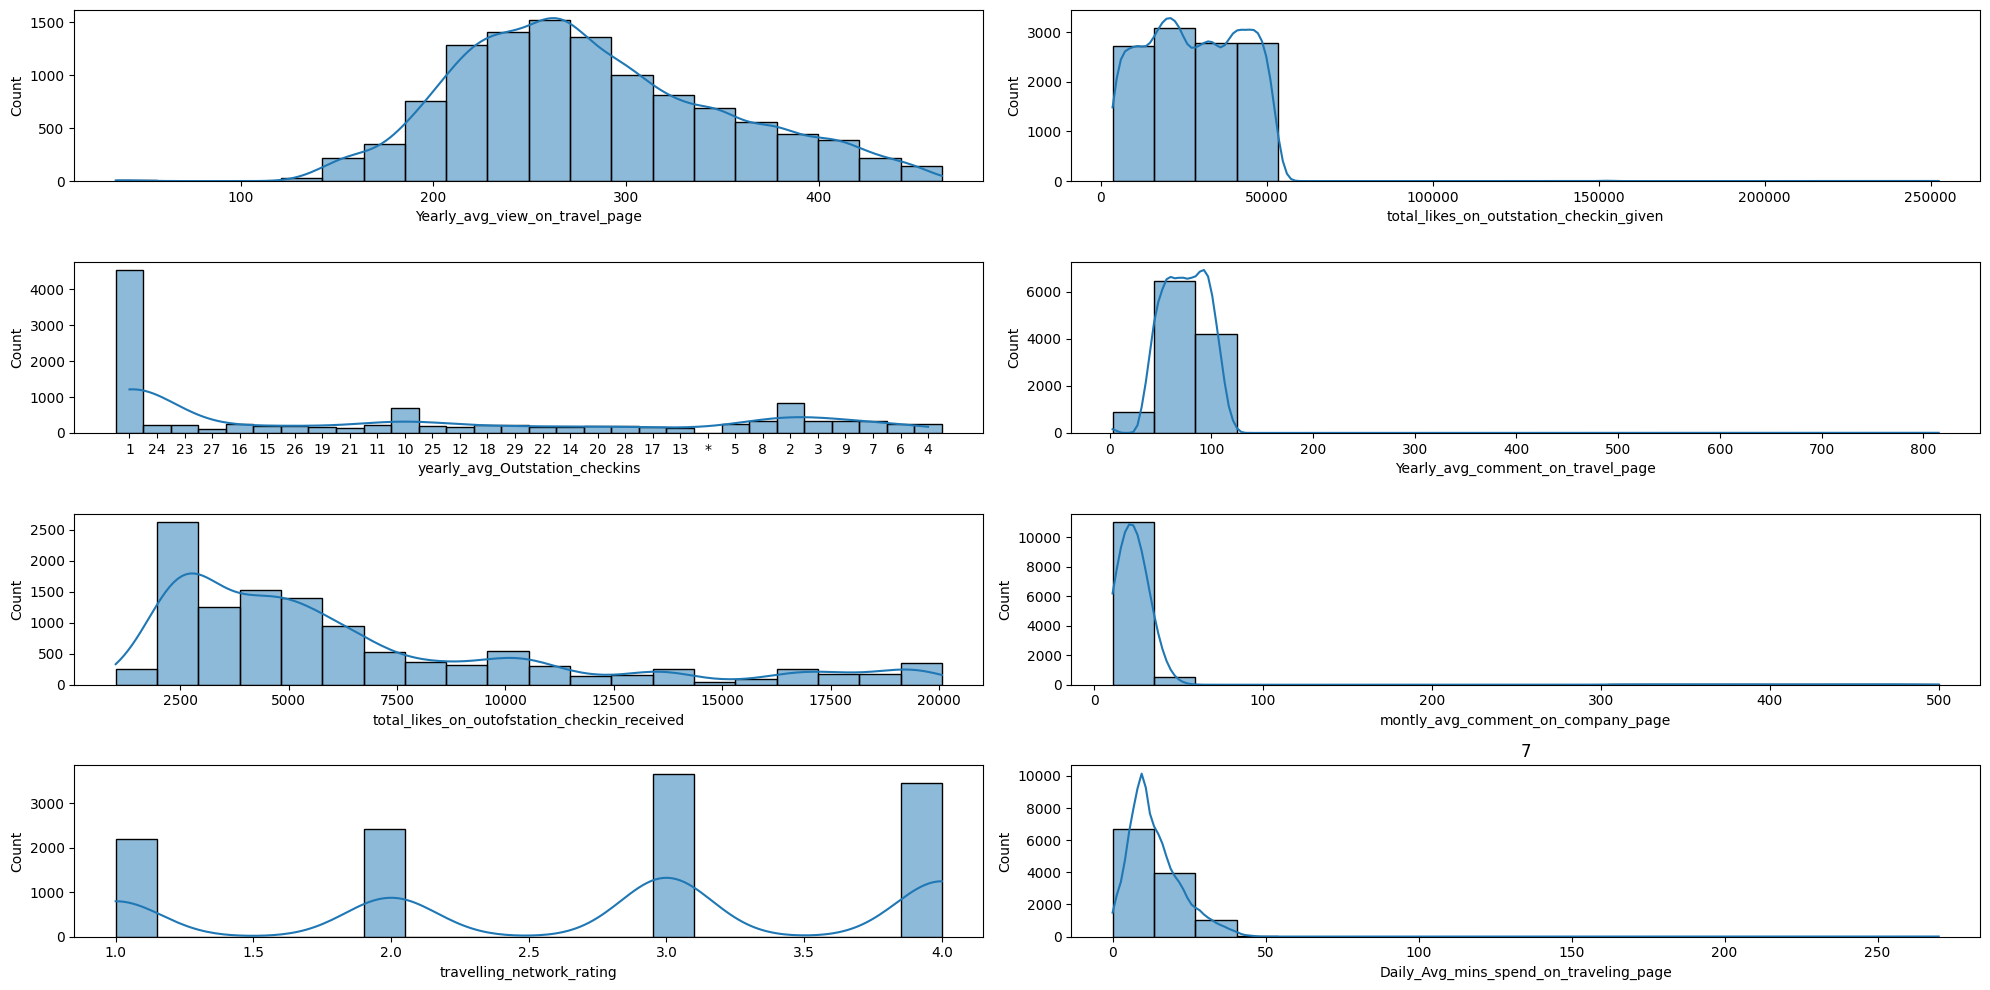

In [224]:
# PLOT THE IHISTOGRAMS FOR ALL NUMERICAL DATA

# using histplot
fig,axes=plt.subplots(nrows=4,ncols=2,figsize=(20,10))
axes=axes.flatten()
for i,feature in enumerate(numerical_data.columns):
    sns.histplot(data=data,x=feature,ax=axes[i],kde=True,bins=20)
    plt.title(i)
plt.tight_layout()
for i in range(len(numerical_data.columns),len(axes)):
    fig.delaxes(axes[i])
        

In [222]:
# to check skewness
skew_data=numerical_data.replace({'*':float('nan')})
skew_data=skew_data.astype('float')
skew_data=skew_data.apply(lambda x: x.fillna(x.mean()))

kurtosis_data=skew_data.kurt()
skew_data=skew_data.skew()
normal_dist=pd.DataFrame({'Features':numerical_data.columns,'Skewness':skew_data.values,'Kurtosis':kurtosis_data.values})
normal_dist

,Features,Skewness,Kurtosis
0,Yearly_avg_view_on_travel_page,0.425038,-0.145981
1,total_likes_on_outstation_checkin_given,0.497765,5.599459
2,yearly_avg_Outstation_checkins,0.971320,-0.362019
3,Yearly_avg_comment_on_travel_page,4.911421,137.240683
4,total_likes_on_outofstation_checkin_received,1.368578,0.998733
5,montly_avg_comment_on_company_page,7.684150,59.662699
6,travelling_network_rating,-0.302557,-1.184860
7,Daily_Avg_mins_spend_on_traveling_page,4.480682,93.943961


In [223]:
numerical_data.columns

Index(['Yearly_avg_view_on_travel_page',
       'total_likes_on_outstation_checkin_given',
       'yearly_avg_Outstation_checkins', 'Yearly_avg_comment_on_travel_page',
       'total_likes_on_outofstation_checkin_received',
       'montly_avg_comment_on_company_page', 'travelling_network_rating',
       'Daily_Avg_mins_spend_on_traveling_page'],
      dtype='object')

In [225]:
# 'Yearly_avg_view_on_travel_page','total_likes_on_outstation_checkin_given','yearly_avg_Outstation_checkins',total_likes_on_outofstation_checkin_received
#  are moderately skewed towards the right
# 'Yearly_avg_comment_on_travel_page','montly_avg_comment_on_company_page','Daily_Avg_mins_spend_on_traveling_page' are highly positive skewed
# 'Yearly_avg_view_on_travel_page', slightly platykurtic with flat peaks and light tails
# 'total_likes_on_outstation_checkin_given', leptokurtic with sharp peaks and heavy tails
# 'yearly_avg_Outstation_checkins', slightly platykurtic with light tails and flat peak 
# 'Yearly_avg_comment_on_travel_page', highly leptokurtic
# 'total_likes_on_outofstation_checkin_received', the only near to normal dist feature with kurtosis at 0.99
# 'montly_avg_comment_on_company_page', leptokurtic
# 'Daily_Avg_mins_spend_on_traveling_page' leptokurtic

# The highly skewed features such as 'Yearly_avg_comment_on_travel_page','Daily_Avg_mins_spend_on_traveling_page',
# 'montly_avg_comment_on_company_page' are highly skewed suggesting that most of the values corresponding to the respective feature crowd towards
# the left with few outliers causing the skewness towards the extreme right. These may require transformations such as quantile,log,sqrt or scalar
# to reduce the skewed nature mainly for a linear model.
# 'Yearly_avg_comment_on_travel_page', 'montly_avg_comment_on_company_page', 'Daily_Avg_mins_spend_on_traveling_page' have kurtosis values
# Indicates sharper peaks with heavy tails suggesting presence of significant extreme outliers. These outliers need to be handled based on requirement
# Yearly_avg_view_on_travel_page, total_likes_on_outstation_checkin_given, and yearly_avg_Outstation_checkins' require no transformations due to their
# closeness to normal distributions
# refer back to improve model performance


In [196]:
# MACHINE LEARNING MODEL 
# RANDOMFOREST CLASSIFIER

In [31]:
# feature engineering by normalization
# upon checking th ehistogram most columns except the first isnt normalized

#data['normalized_total_likes_on_outstation_checkin_given']=np.log(data.total_likes_on_outstation_checkin_given+1)
#data['normalized_yearly_avg_Outstation_checkins']=np.log(data.yearly_avg_Outstation_checkins+1)
#data['normalized_Yearly_avg_comment_on_travel_page']=np.log(data.Yearly_avg_comment_on_travel_page+1)
#data['normalized_total_likes_on_outofstation_checkin_received']=np.log(data.total_likes_on_outofstation_checkin_received+1)
#data['normalized_montly_avg_comment_on_company_page']=np.log(data.montly_avg_comment_on_company_page+1)
#data['normalized_Daily_Avg_mins_spend_on_traveling_page']=np.log(data.Daily_Avg_mins_spend_on_traveling_page+1)


# convert object dtype to int---- yearly_avg_Outstation_checkins                

In [69]:
numerical_data.yearly_avg_Outstation_checkins.unique()        

array(['1', '24', '23', '27', '16', '15', '26', '19', '21', '11', '10',
       '25', '12', '18', '29', nan, '22', '14', '20', '28', '17', '13',
       '*', '5', '8', '2', '3', '9', '7', '6', '4'], dtype=object)

In [70]:
# replace *
data.yearly_avg_Outstation_checkins.replace('*',float('nan'),inplace=True)

In [71]:
data['yearly_avg_Outstation_checkins'].dtype

dtype('O')

In [72]:
data['yearly_avg_Outstation_checkins'].fillna(data['yearly_avg_Outstation_checkins'].value_counts().index[0],inplace=True)

In [73]:
data['yearly_avg_Outstation_checkins']=data['yearly_avg_Outstation_checkins'].astype(float)

In [74]:
# normalize again
#data['normalized_total_likes_on_outstation_checkin_given']=np.log(data.total_likes_on_outstation_checkin_given+1)
#data['normalized_yearly_avg_Outstation_checkins']=np.log(data.yearly_avg_Outstation_checkins+1)
#data['normalized_Yearly_avg_comment_on_travel_page']=np.log(data.Yearly_avg_comment_on_travel_page+1)
#data['normalized_total_likes_on_outofstation_checkin_received']=np.log(data.total_likes_on_outofstation_checkin_received+1)
#data['normalized_montly_avg_comment_on_company_page']=np.log(data.montly_avg_comment_on_company_page+1)
#data['normalized_Daily_Avg_mins_spend_on_traveling_page']=np.log(data.Daily_Avg_mins_spend_on_traveling_page+1)


In [75]:
# check the histogram again for these values
# create a new dataframe of the normalized variables

#numerical_columns_normalized=data[['normalized_total_likes_on_outstation_checkin_given',
#'normalized_yearly_avg_Outstation_checkins',
#'normalized_Yearly_avg_comment_on_travel_page',
#'normalized_total_likes_on_outofstation_checkin_received',
#'normalized_montly_avg_comment_on_company_page',
#'normalized_Daily_Avg_mins_spend_on_traveling_page']]

In [76]:
# PLOT THE IHISTOGRAMS FOR ALL NUMERICAL DATA
# using histplot
#for i in numerical_columns_normalized.columns:
#    ax=sns.histplot(data=data,x=i)
#    plt.title(i)
#    for p in ax.patches:
#        ax.text(p.get_x()+p.get_width()/2,p.get_height(),p.get_height(),va='bottom',ha='center')
#    plt.show()
        

In [77]:
# PLOT THE IHISTOGRAMS FOR ALL NUMERICAL DATA
# using histplot
#for i in numerical_columns_normalized.columns:
#    ax=sns.histplot(data=data,x=i)
#    plt.title(i)
 #   for p in ax.patches:
  #      ax.text(p.get_x()+p.get_width()/2,p.get_height(),p.get_height(),va='bottom',ha='center')
   # plt.show()
        

Yearly_avg_view_on_travel_page                     Axes(0.125,0.653529;0.133621x0.226471)
total_likes_on_outstation_checkin_given         Axes(0.285345,0.653529;0.133621x0.226471)
Yearly_avg_comment_on_travel_page                Axes(0.44569,0.653529;0.133621x0.226471)
total_likes_on_outofstation_checkin_received    Axes(0.606034,0.653529;0.133621x0.226471)
montly_avg_comment_on_company_page              Axes(0.766379,0.653529;0.133621x0.226471)
travelling_network_rating                          Axes(0.125,0.381765;0.133621x0.226471)
Daily_Avg_mins_spend_on_traveling_page          Axes(0.285345,0.381765;0.133621x0.226471)
dtype: object

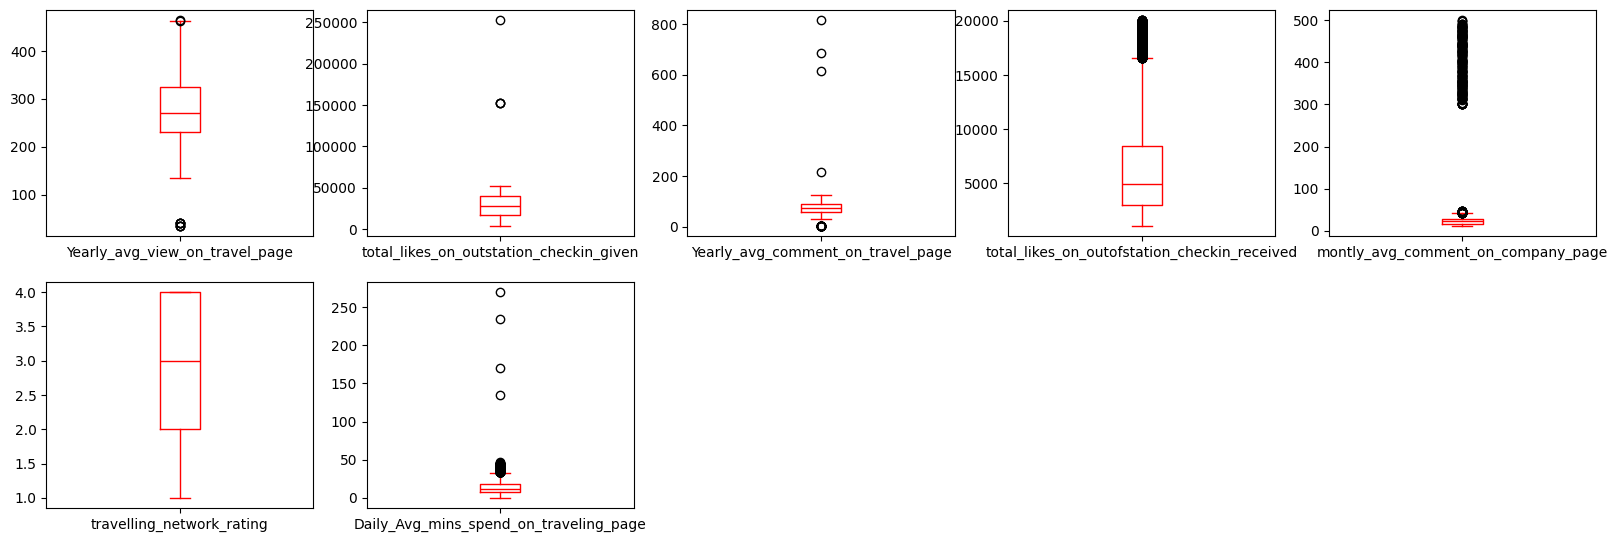

In [44]:
# data still appears skewed
# check for outliers
# box plots for all numerical columns
numerical_columns.plot(kind='box',subplots=True,sharex=False,sharey=False,layout=(3,5),figsize=(20,10),color='red')


In [78]:
# outliers may indicate potential customers
# remove outliers without a library
#features_contianing_outliers=['Yearly_avg_view_on_travel_page',
 #      'total_likes_on_outstation_checkin_given',
  #'yearly_avg_Outstation_checkins', 'Yearly_avg_comment_on_travel_page',
   #    'total_likes_on_outofstation_checkin_received',
    #   'montly_avg_comment_on_company_page',
     #  'Daily_Avg_mins_spend_on_traveling_page']
#def outlier_detector(data_set,drop=False):
 #   for feature in features_contianing_outliers:
  #      Q1=np.percentile(data_set[feature],25.)
   #     Q3=np.percentile(data_set[feature],75.)
    #    IQR=Q3-Q1
     #   outlier_step=1.5*IQR
  #      outliers_for_feature=data_set[feature][~((data_set[feature]>=Q1-outlier_step) & 
   #                                             (data_set[feature]<=Q3+outlier_step))].index.tolist()
    #    if not drop:
     #       print('The feature-- {} has {}  no. of outliers'.format(feature,len(outliers_for_feature)))
      #  if drop:
       #     data_set.drop(outliers_for_feature,inplace=True,errors='ignore')
            

In [79]:
#new_data_set=data[features_contianing_outliers]

In [80]:
#new_data_set

In [50]:
# check the boxplots for each
#new_data_set.plot(kind='box',sharex=False,sharey=False,subplots=True,figsize=(20,30),layout=(3,5))

In [51]:
#outlier_detector(new_data_set)

In [52]:
#new_data_set.info()

In [53]:
# second outlier detector similar to the first
# using 

#def outlier_detector(data_set_name,drop=False):
 #   for features in data_set_name.columns:
  #      Q1=np.percentile(data_set_name[features],25.)
   #     Q3=np.percentile(data_set_name[features],75.)
    #    IQR=Q3-Q1
     #   outlier_mask=data_set_name[features][~((data_set_name[features]>=Q1-IQR*1.5)&(data_set_name[features]<=Q3+IQR*1.5))].index.tolist()
      #  if not drop:
       #     print(features,len(outlier_mask))
       # if drop:
        #    data.drop(outlier_mask,inplace=True,errors='ignore')

In [54]:
#outlier_detector(data[features_contianing_outliers])

In [81]:
data.isnull().sum()

UserID                                            0
Taken_product                                     0
Yearly_avg_view_on_travel_page                  581
preferred_device                                 53
total_likes_on_outstation_checkin_given         381
yearly_avg_Outstation_checkins                    0
member_in_family                                  0
preferred_location_type                          31
Yearly_avg_comment_on_travel_page               206
total_likes_on_outofstation_checkin_received      0
week_since_last_outstation_checkin                0
following_company_page                          103
montly_avg_comment_on_company_page                0
working_flag                                      0
travelling_network_rating                         0
Adult_flag                                        0
Daily_Avg_mins_spend_on_traveling_page            0
dtype: int64

In [84]:
for i in data.columns:
    if data[i].dtype in ['int64','float64']:
        data[i]=data[i].fillna(data[i].mean())
    else:
        data[i]=data[i].fillna(data[i].value_counts().index[0])
        

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   UserID                                        11760 non-null  int64  
 1   Taken_product                                 11760 non-null  object 
 2   Yearly_avg_view_on_travel_page                11760 non-null  float64
 3   preferred_device                              11760 non-null  object 
 4   total_likes_on_outstation_checkin_given       11760 non-null  float64
 5   yearly_avg_Outstation_checkins                11760 non-null  float64
 6   member_in_family                              11760 non-null  object 
 7   preferred_location_type                       11760 non-null  object 
 8   Yearly_avg_comment_on_travel_page             11760 non-null  float64
 9   total_likes_on_outofstation_checkin_received  11760 non-null 

In [86]:
# normalizing and outlier detection of data

In [88]:
data.isnull().any()

UserID                                          False
Taken_product                                   False
Yearly_avg_view_on_travel_page                  False
preferred_device                                False
total_likes_on_outstation_checkin_given         False
yearly_avg_Outstation_checkins                  False
member_in_family                                False
preferred_location_type                         False
Yearly_avg_comment_on_travel_page               False
total_likes_on_outofstation_checkin_received    False
week_since_last_outstation_checkin              False
following_company_page                          False
montly_avg_comment_on_company_page              False
working_flag                                    False
travelling_network_rating                       False
Adult_flag                                      False
Daily_Avg_mins_spend_on_traveling_page          False
dtype: bool

In [89]:
# split of mobile and laptop data
laptop_data=data[data.preferred_device=='Laptop']
mobile_data=data[data.preferred_device=='Mobile']

In [90]:
data.to_csv('Socialmediapb.csv')
laptop_data.to_csv('laptoppb.csv')
mobile_data.to_csv('mobilepb.csv')

In [32]:
# machine learning
from sklearn.preprocessing import StandardScaler,RobustScaler,LabelEncoder
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [33]:
# drop uneccessary columns
#UserID
data=data.drop('UserID',axis=1)
# impute all missing values before OHE LE to avoid creating new columns for nan values
# as data cannot contain null values while encoding

In [34]:
# we need two seperate models corresponding to laptop and mobile device based users 
# we will divide the dataset once the null values for only this specific feature has been handled
# The other features will be handled seperately once the dataset is split
data.preferred_device.fillna(data.preferred_device.value_counts().index[0],inplace=True)

In [41]:
# split of mobile and laptop data
laptop_data=data[data.preferred_device=='Laptop']
mobile_data=data[data.preferred_device=='Mobile']

In [250]:
# check the split
laptop_data.sample(10)

,UserID,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
6642,1006643,Yes,200.0,Laptop,11981.0,2,3,Beach,61.0,2049,6,Yes,25,No,2,1,6
6956,1006957,No,408.0,Laptop,36753.0,11,4,Historical site,90.0,16038,3,No,23,Yes,1,1,26
8330,1008331,Yes,241.0,Laptop,24615.0,2,3,Beach,96.0,2789,7,No,22,No,3,0,3
7751,1007752,No,429.0,Laptop,31715.0,6,3,Beach,95.0,13220,9,No,23,No,4,3,36
9285,1009286,No,357.0,Laptop,36238.0,18,1,Historical site,99.0,10587,7,No,25,No,4,0,31
8240,1008241,No,413.0,Laptop,33816.0,1,4,Beach,62.0,10509,7,No,25,No,1,1,33
6718,1006719,Yes,325.0,Laptop,16846.0,12,3,Beach,56.0,13766,0,Yes,16,No,2,0,22
10747,1010748,Yes,144.0,Laptop,45753.0,5,3,Big Cities,87.0,1933,3,Yes,31,No,4,0,7
9607,1009608,No,426.0,Laptop,38230.0,2,1,Beach,79.0,11033,5,No,37,No,2,1,29
7572,1007573,No,288.0,Laptop,23215.0,11,3,Other,59.0,12189,1,Yes,18,No,3,3,10


In [249]:
mobile_data.sample(10)

,UserID,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
5471,1005472,No,182.0,Mobile,29083.0,13,2,Financial,83.0,2083,3,No,19,No,3,1,4
8453,1008454,No,368.0,Mobile,17228.0,16,4,Beach,100.0,6443,8,No,24,No,3,1,18
10631,1010632,No,297.0,Mobile,12048.0,15,2,Beach,114.0,11564,0,Yes,23,No,2,1,17
834,1000835,No,255.0,Mobile,49000.0,1,1,Financial,70.0,5714,1,No,20,Yes,1,0,6
1094,1001095,No,300.0,Mobile,46970.0,1,2,Medical,47.0,5473,0,No,12,No,4,0,9
137,1000138,No,292.0,Mobile,NaN,1,4,Financial,47.0,5902,4,No,14,No,3,1,17
5712,1005713,No,263.0,Mobile,6513.0,23,4,Medical,103.0,2765,2,No,21,No,2,1,6
11548,1011549,No,223.0,Mobile,20704.0,4,3,Trekking,103.0,2167,1,No,27,No,3,1,3
2689,1002690,No,217.0,Mobile,37870.0,1,4,Medical,43.0,2974,9,No,17,No,3,1,9
10714,1010715,No,436.0,Mobile,7402.0,29,3,Big Cities,77.0,14177,4,No,30,No,3,1,34


In [319]:
# split features and target for both laptop and mobile data as we run two differrent models
laptop_features=laptop_data.drop('Taken_product',axis=1)
laptop_target=laptop_data['Taken_product']

In [320]:
mobile_features=mobile_data.drop('Taken_product',axis=1)
mobile_target=mobile_data['Taken_product']

In [396]:
X_train_laptop,X_test_laptop,y_train_laptop,y_test_laptop=train_test_split(laptop_features,laptop_target,test_size=0.2,random_state=42)
X_train_mobile,X_test_mobile,y_train_mobile,y_test_mobile=train_test_split(mobile_features,mobile_target,test_size=0.2,random_state=42)

y_train_laptop=y_train_laptop.replace({'Yes':1,'No':0})
y_test_laptop=y_test_laptop.replace({'Yes':1,'No':0})
y_train_mobile=y_train_mobile.replace({'Yes':1,'No':0})
y_test_mobile=y_test_mobile.replace({'Yes':1,'No':0})

In [397]:
# laptop_data
# impute missing values
# handle encoding and scaling as needed
#preprocessing_0 laptop

from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
numerical_transformer=Pipeline(steps=[('imputer',SimpleImputer(strategy='mean')),
                                     ('scaler',StandardScaler())])
cat_non_ord_transformer=Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent')),
                                        ('encoder',OneHotEncoder(handle_unknown='ignore'))])
cat_ord_transformer=Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent')),('encoder',OrdinalEncoder())])
preprocessor_laptop_0=ColumnTransformer(transformers=[('num',numerical_transformer,numerical_data.columns),
                                               ('cat_non_ord',cat_non_ord_transformer,categorical_data_without_ordinal_significance.columns),
                                               ('cat_ord',cat_ord_transformer,categorical_data_with_ordinal_significance.columns)],remainder='passthrough')
pipeline_laptop_0=Pipeline(steps=[('preprocessor_laptop_0',preprocessor_laptop_0)])

X_train_laptop_index=X_train_laptop.index
X_test_laptop_index=X_test_laptop.index

X_train_laptop_0=pipeline_laptop_0.fit_transform(X_train_laptop)
X_test_laptop_0=pipeline_laptop_0.transform(X_test_laptop)

X_train_laptop_0=pd.DataFrame(X_train_laptop_0,index=X_train_laptop_index,columns=pipeline_laptop_0.named_steps['preprocessor_laptop_0'].get_feature_names_out())
X_test_laptop_0=pd.DataFrame(X_test_laptop_0,index=X_test_laptop_index,columns=pipeline_laptop_0.named_steps['preprocessor_laptop_0'].get_feature_names_out())

y_train_laptop_0=y_train_laptop.copy()
y_test_laptop_0=y_test_laptop.copy()

In [398]:
# mobile_data
# impute missing values
# handle encoding and scaling as needed
# preprocessing_0 mobile


from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
numerical_transformer=Pipeline(steps=[('imputer',SimpleImputer(strategy='mean')),
                                     ('scaler',StandardScaler())])
cat_non_ord_transformer=Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent')),
                                        ('encoder',OneHotEncoder(handle_unknown='ignore'))])
cat_ord_transformer=Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent')),('encoder',OrdinalEncoder())])
preprocessor_mobile_0=ColumnTransformer(transformers=[('num',numerical_transformer,numerical_data.columns),
                                               ('cat_non_ord',cat_non_ord_transformer,categorical_data_without_ordinal_significance.columns),
                                               ('cat_ord',cat_ord_transformer,categorical_data_with_ordinal_significance.columns)],remainder='passthrough')
pipeline_mobile_0=Pipeline(steps=[('preprocessor_mobile_0',preprocessor_mobile_0)])

X_train_mobile_index=X_train_mobile.index
X_test_mobile_index=X_test_mobile.index

X_train_mobile_0=pipeline_mobile_0.fit_transform(X_train_mobile)
X_test_mobile_0=pipeline_mobile_0.transform(X_test_mobile)

X_train_mobile_0=pd.DataFrame(X_train_mobile_0,index=X_train_mobile_index,columns=pipeline_mobile_0.named_steps['preprocessor_mobile_0'].get_feature_names_out())
X_test_mobile_0=pd.DataFrame(X_test_mobile_0,index=X_test_mobile_index,columns=pipeline_mobile_0.named_steps['preprocessor_mobile_0'].get_feature_names_out())

y_train_mobile_0=y_train_mobile.copy()
y_test_mobile_0=y_test_mobile.copy()

In [399]:
# laptop_data
# impute missing values
# handle encoding and scaling as needed
#preprocessing_1 laptop

from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

X_train_laptop_1=X_train_laptop.copy()
X_test_laptop_1=X_test_laptop.copy()

X_train_laptop_index=X_train_laptop.index
X_test_laptop_index=X_test_laptop.index

#impute
imputer=SimpleImputer(strategy='most_frequent')
X_train_laptop_1=imputer.fit_transform(X_train_laptop_1)
X_test_laptop_1=imputer.transform(X_test_laptop_1)

X_train_laptop_1=pd.DataFrame(X_train_laptop_1,index=X_train_laptop_index,columns=X_train_laptop.columns)
X_test_laptop_1=pd.DataFrame(X_test_laptop_1,index=X_test_laptop_index,columns=X_test_laptop.columns)

# label encoding the columns prior to applying pipeline
le=LabelEncoder()
for i in categorical_data.columns:
    X_train_laptop_1[i]=le.fit_transform(X_train_laptop_1[i])
    X_test_laptop_1[i]=le.transform(X_test_laptop_1[i])

numerical_transformer=Pipeline(steps=[('imputer',SimpleImputer(strategy='mean')),
                                     ('scaler',StandardScaler())])

preprocessor_laptop_1=ColumnTransformer(transformers=[('num',numerical_transformer,numerical_data.columns)],remainder='passthrough')
pipeline_laptop_1=Pipeline(steps=[('preprocessor_laptop_1',preprocessor_laptop_1)])

X_train_laptop_index=X_train_laptop.index
X_test_laptop_index=X_test_laptop.index

X_train_laptop_1=pipeline_laptop_1.fit_transform(X_train_laptop_1)
X_test_laptop_1=pipeline_laptop_1.transform(X_test_laptop_1)

X_train_laptop_1=pd.DataFrame(X_train_laptop_1,index=X_train_laptop_index,columns=pipeline_laptop_1.named_steps['preprocessor_laptop_1'].get_feature_names_out())
X_test_laptop_1=pd.DataFrame(X_test_laptop_1,index=X_test_laptop_index,columns=pipeline_laptop_1.named_steps['preprocessor_laptop_1'].get_feature_names_out())

y_train_laptop_1=y_train_laptop.copy()
y_test_laptop_1=y_test_laptop.copy()

In [400]:
# mobile_data
# impute missing values
# handle encoding and scaling as needed
# preprocessing_1 mobile


from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

X_train_mobile_1=X_train_mobile.copy()
X_test_mobile_1=X_test_mobile.copy()

X_train_mobile_index=X_train_mobile.index
X_test_mobile_index=X_test_mobile.index

#impute
imputer=SimpleImputer(strategy='most_frequent')
X_train_mobile_1=imputer.fit_transform(X_train_mobile_1)
X_test_mobile_1=imputer.transform(X_test_mobile_1)

X_train_mobile_1=pd.DataFrame(X_train_mobile_1,index=X_train_mobile_index,columns=X_train_mobile.columns)
X_test_mobile_1=pd.DataFrame(X_test_mobile_1,index=X_test_mobile_index,columns=X_test_mobile.columns)

# label encoding the columns prior to applying pipeline
le=LabelEncoder()
for i in categorical_data.columns:
    X_train_mobile_1[i]=le.fit_transform(X_train_mobile_1[i])
    X_test_mobile_1[i]=le.transform(X_test_mobile_1[i])

    
numerical_transformer=Pipeline(steps=[('imputer',SimpleImputer(strategy='mean')),
                                     ('scaler',StandardScaler())])

preprocessor_mobile_1=ColumnTransformer(transformers=[('num',numerical_transformer,numerical_data.columns)],remainder='passthrough')
pipeline_mobile_1=Pipeline(steps=[('preprocessor_mobile_1',preprocessor_mobile_1)])

X_train_mobile_index=X_train_mobile.index
X_test_mobile_index=X+_test_mobile.index

X_train_mobile_1=pipeline_mobile_1.fit_transform(X_train_mobile_1)
X_test_mobile_1=pipeline_mobile_1.transform(X_test_mobile_1)

X_train_mobile_1=pd.DataFrame(X_train_mobile_1,index=X_train_mobile_index,columns=pipeline_mobile_1.named_steps['preprocessor_mobile_1'].get_feature_names_out())
X_test_mobile_1=pd.DataFrame(X_test_mobile_1,index=X_test_mobile_index,columns=pipeline_mobile_1.named_steps['preprocessor_mobile_1'].get_feature_names_out())

y_train_mobile_1=y_train_mobile.copy()
y_test_mobile_1=y_test_mobile.copy()

In [401]:
X_train_laptop_0_bo=X_train_laptop_0.copy()
X_test_laptop_0_bo=X_test_laptop_0.copy()
X_train_laptop_1_bo=X_train_laptop_1.copy()
X_test_laptop_1_bo=X_test_laptop_1.copy()

X_train_mobile_0_bo=X_train_mobile_0.copy()
X_test_mobile_0_bo=X_test_mobile_0.copy()
X_train_mobile_1_bo=X_train_mobile_1.copy()
X_test_mobile_1_bo=X_test_mobile_1.copy()


In [402]:
# REMOVING OUTLIERS USING ISOLATION FOREST LAPTOP 0
from sklearn.ensemble import IsolationForest

outlier_detector_laptop_0=IsolationForest(contamination=0.05)
outlier_mask_laptop_0_train=outlier_detector_laptop_0.fit_predict(X_train_laptop_0)
X_train_laptop_0=X_train_laptop_0[outlier_mask_laptop_0_train==1]
y_train_laptop_0=y_train_laptop_0[outlier_mask_laptop_0_train==1]

outlier_mask_laptop_0_test=outlier_detector_laptop_0.predict(X_test_laptop_0)
X_test_laptop_0=X_test_laptop_0[outlier_mask_laptop_0_test==1]
y_test_laptop_0=y_test_laptop_0[outlier_mask_laptop_0_test==1]

# REMOVING OUTLIERS USING ISOLATION FOREST LAPTOP 1
from sklearn.ensemble import IsolationForest

outlier_detector_laptop_1=IsolationForest(contamination=0.05)
outlier_mask_laptop_1_train=outlier_detector_laptop_1.fit_predict(X_train_laptop_1)
X_train_laptop_1=X_train_laptop_1[outlier_mask_laptop_1_train==1]
y_train_laptop_1=y_train_laptop_1[outlier_mask_laptop_1_train==1]

outlier_mask_laptop_1_test=outlier_detector_laptop_1.predict(X_test_laptop_1)
X_test_laptop_1=X_test_laptop_1[outlier_mask_laptop_1_test==1]
y_test_laptop_1=y_test_laptop_1[outlier_mask_laptop_1_test==1]

In [403]:
# REMOVING OUTLIERS USING ISOLATION FOREST MOBILE 0
from sklearn.ensemble import IsolationForest

outlier_detector_mobile_0=IsolationForest(contamination=0.05)
outlier_mask_mobile_0_train=outlier_detector_mobile_0.fit_predict(X_train_mobile_0)
X_train_mobile_0=X_train_mobile_0[outlier_mask_mobile_0_train==1]
y_train_mobile_0=y_train_mobile_0[outlier_mask_mobile_0_train==1]

outlier_mask_mobile_0_test=outlier_detector_mobile_0.predict(X_test_mobile_0)
X_test_mobile_0=X_test_mobile_0[outlier_mask_mobile_0_test==1]
y_test_mobile_0=y_test_mobile_0[outlier_mask_mobile_0_test==1]

# REMOVING OUTLIERS USING ISOLATION FOREST MOBILE 1
from sklearn.ensemble import IsolationForest

outlier_detector_mobile_1=IsolationForest(contamination=0.05)
outlier_mask_mobile_1_train=outlier_detector_mobile_1.fit_predict(X_train_mobile_1)
X_train_mobile_1=X_train_mobile_1[outlier_mask_mobile_1_train==1]
y_train_mobile_1=y_train_mobile_1[outlier_mask_mobile_1_train==1]

outlier_mask_mobile_1_test=outlier_detector_mobile_1.predict(X_test_mobile_1)
X_test_mobile_1=X_test_mobile_1[outlier_mask_mobile_1_test==1]
y_test_mobile_1=y_test_mobile_1[outlier_mask_mobile_1_test==1]

In [407]:
# no. of outlier data points forund in each dataset
print('The number of outliers in X_train_laptop_0-',len(X_train_laptop_0_bo[outlier_mask_laptop_0_train==-1]))
print('The number of outliers in X_test_laptop_0-',len(X_test_laptop_0_bo[outlier_mask_laptop_0_test==-1]))
print('The number of outliers in X_train_laptop_1-',len(X_train_laptop_1_bo[outlier_mask_laptop_1_train==-1]))
print('The number of outliers in X_test_laptop_1-',len(X_test_laptop_1_bo[outlier_mask_laptop_1_test==-1]))
print('-----------------------------------------------------------------------------')
print('The number of outliers in X_train_mobile_0-',len(X_train_mobile_0_bo[outlier_mask_mobile_0_train==-1]))
print('The number of outliers in X_test_mobile_0-',len(X_test_mobile_0_bo[outlier_mask_mobile_0_test==-1]))
print('The number of outliers in X_train_mobile_1-',len(X_train_mobile_1_bo[outlier_mask_mobile_1_train==-1]))
print('The number of outliers in X_test_mobile_1-',len(X_test_mobile_1_bo[outlier_mask_mobile_1_test==-1]))

The number of outliers in X_train_laptop_0- 45
The number of outliers in X_test_laptop_0- 13
The number of outliers in X_train_laptop_1- 45
The number of outliers in X_test_laptop_1- 10
-----------------------------------------------------------------------------
The number of outliers in X_train_mobile_0- 426
The number of outliers in X_test_mobile_0- 108
The number of outliers in X_train_mobile_1- 426
The number of outliers in X_test_mobile_1- 107


In [418]:
numerical_X_train_laptop_0=[]
for i in X_train_laptop_0.columns:
    if 'num__' in i:
        numerical_X_train_laptop_0.append(i)

numerical_X_test_laptop_0=[]
for i in X_test_laptop_0.columns:
    if 'num__' in i:
        numerical_X_test_laptop_0.append(i)


numerical_X_train_mobile_0=[]
for i in X_train_mobile_0.columns:
    if 'num__' in i:
        numerical_X_train_mobile_0.append(i)

numerical_X_test_mobile_0=[]
for i in X_test_mobile_0.columns:
    if 'num__' in i:
        numerical_X_test_mobile_0.append(i)

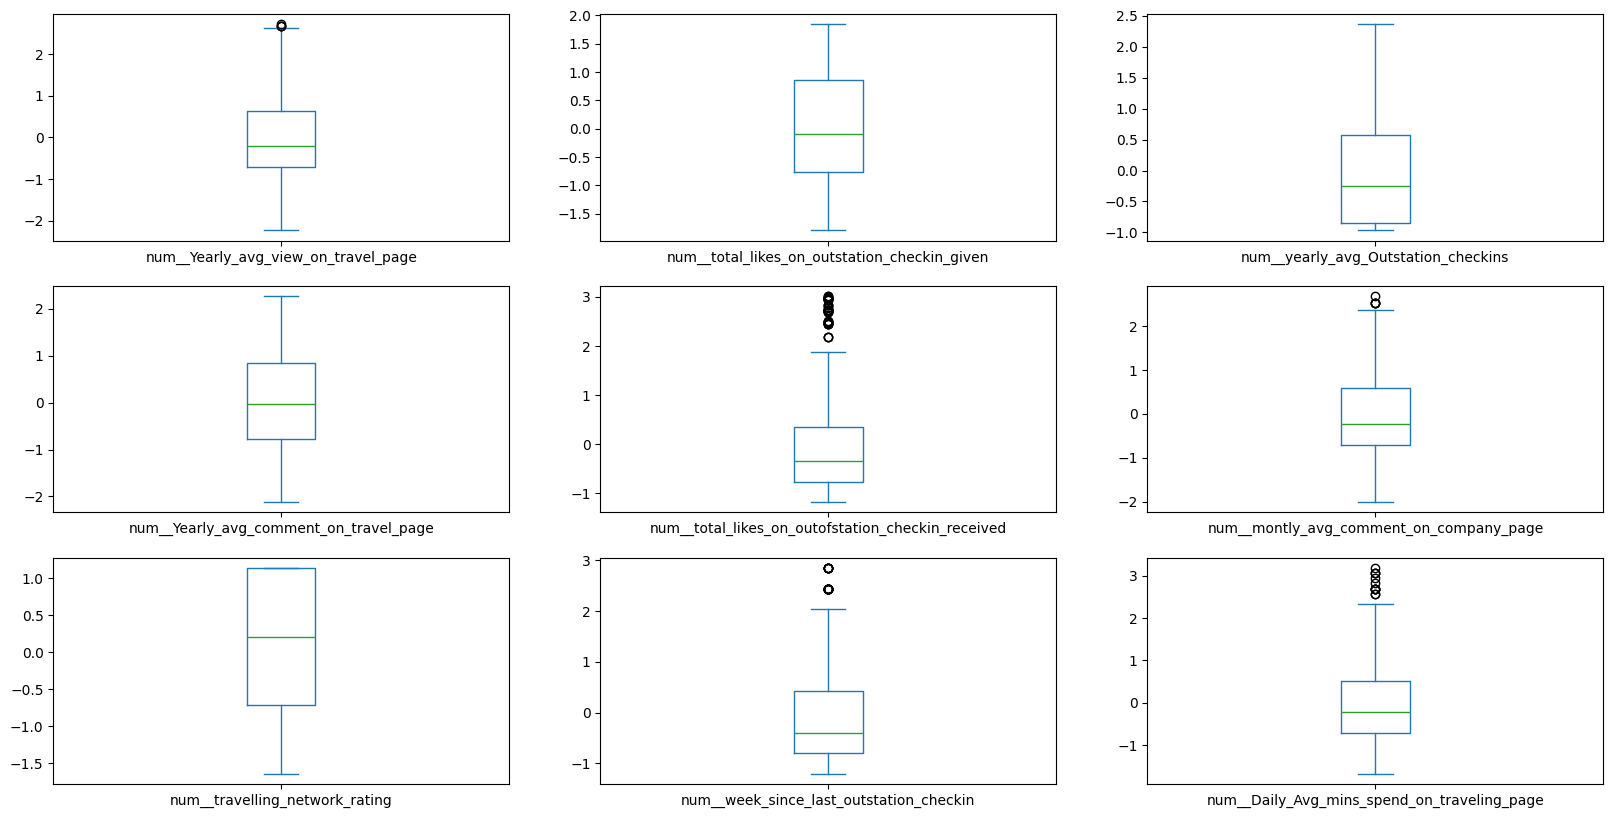

In [416]:
# boxplots to view outlier removal

# X_train_laptop_0
X_train_laptop_0[numerical_X_train_laptop_0].plot(kind='box',subplots=True,sharex=False,sharey=False,layout=(3,3),figsize=(20,10))

plt.show()

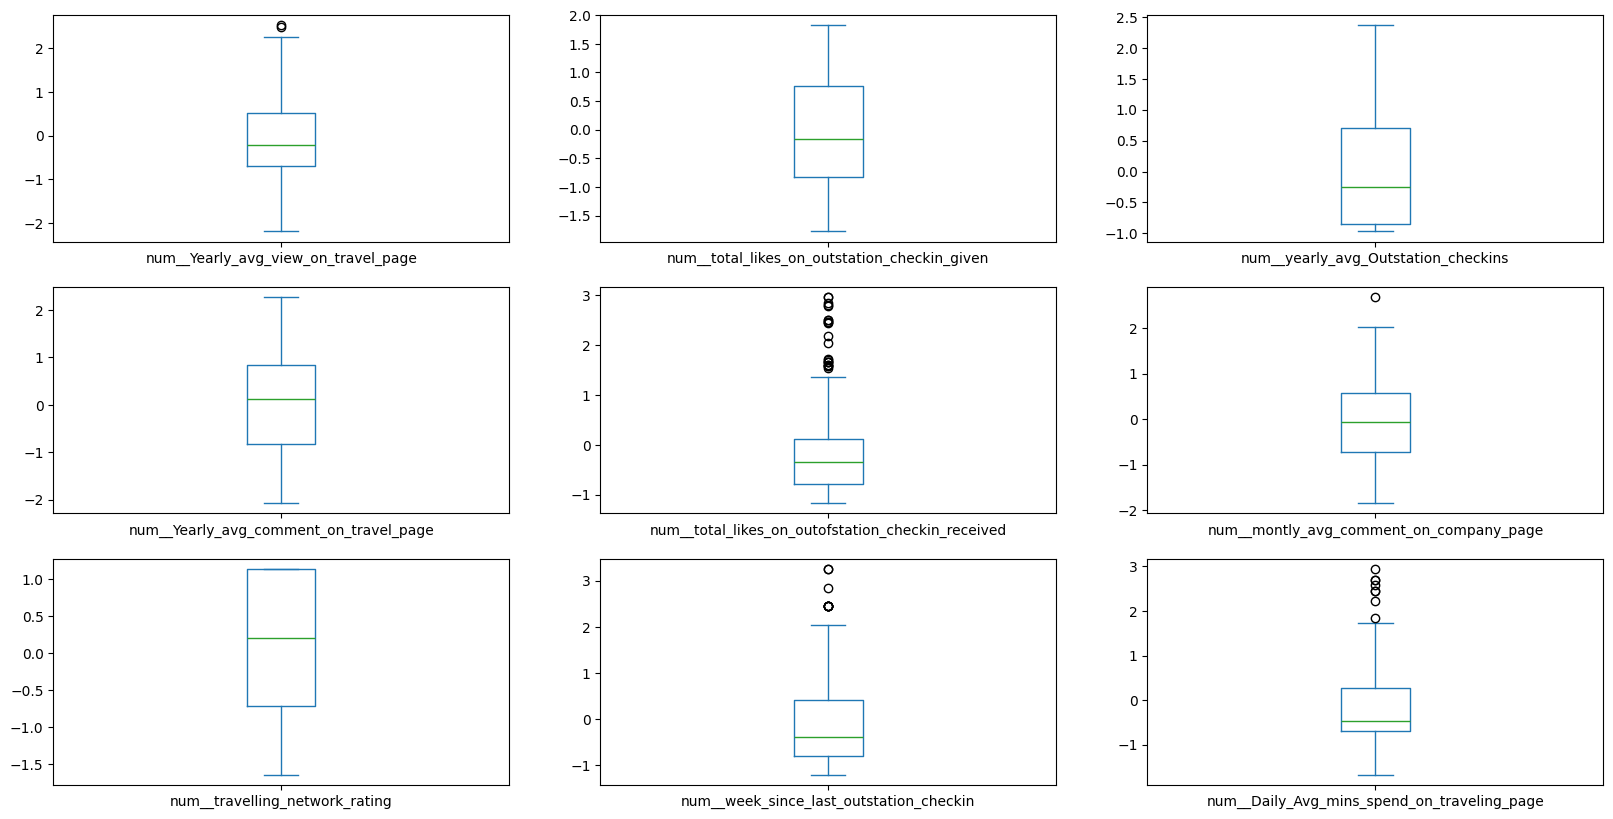

In [420]:
# boxplots to view outlier removal

# X_test_laptop_0
X_test_laptop_0[numerical_X_train_laptop_1].plot(kind='box',subplots=True,sharex=False,sharey=False,layout=(3,3),figsize=(20,10))

plt.show()

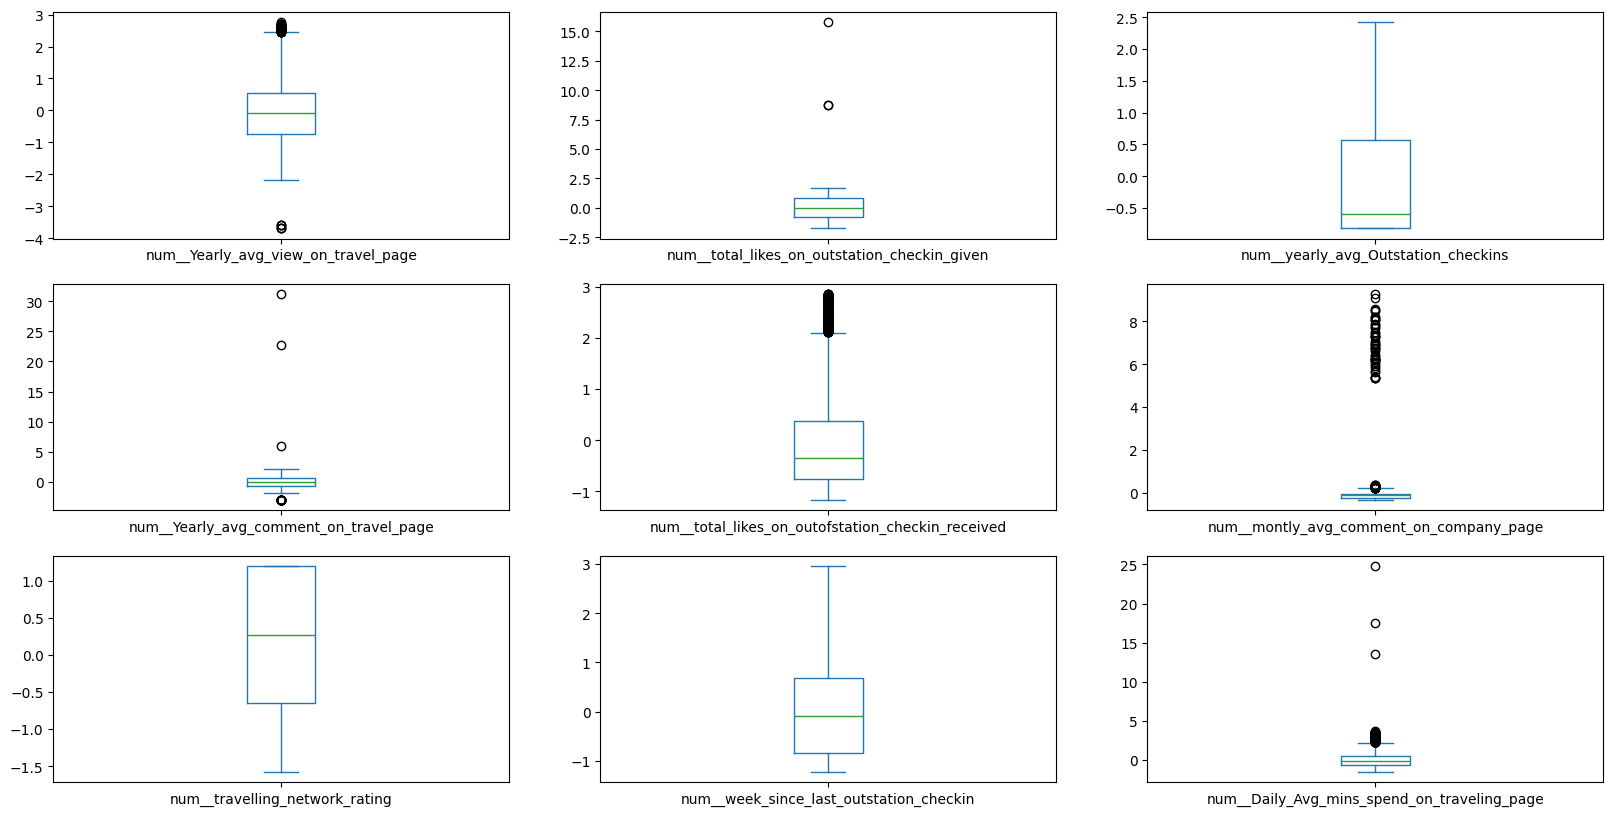

In [421]:
# boxplots to view outlier removal

# X_train_mobile_0
X_train_mobile_0[numerical_X_train_mobile_0].plot(kind='box',subplots=True,sharex=False,sharey=False,layout=(3,3),figsize=(20,10))

plt.show()

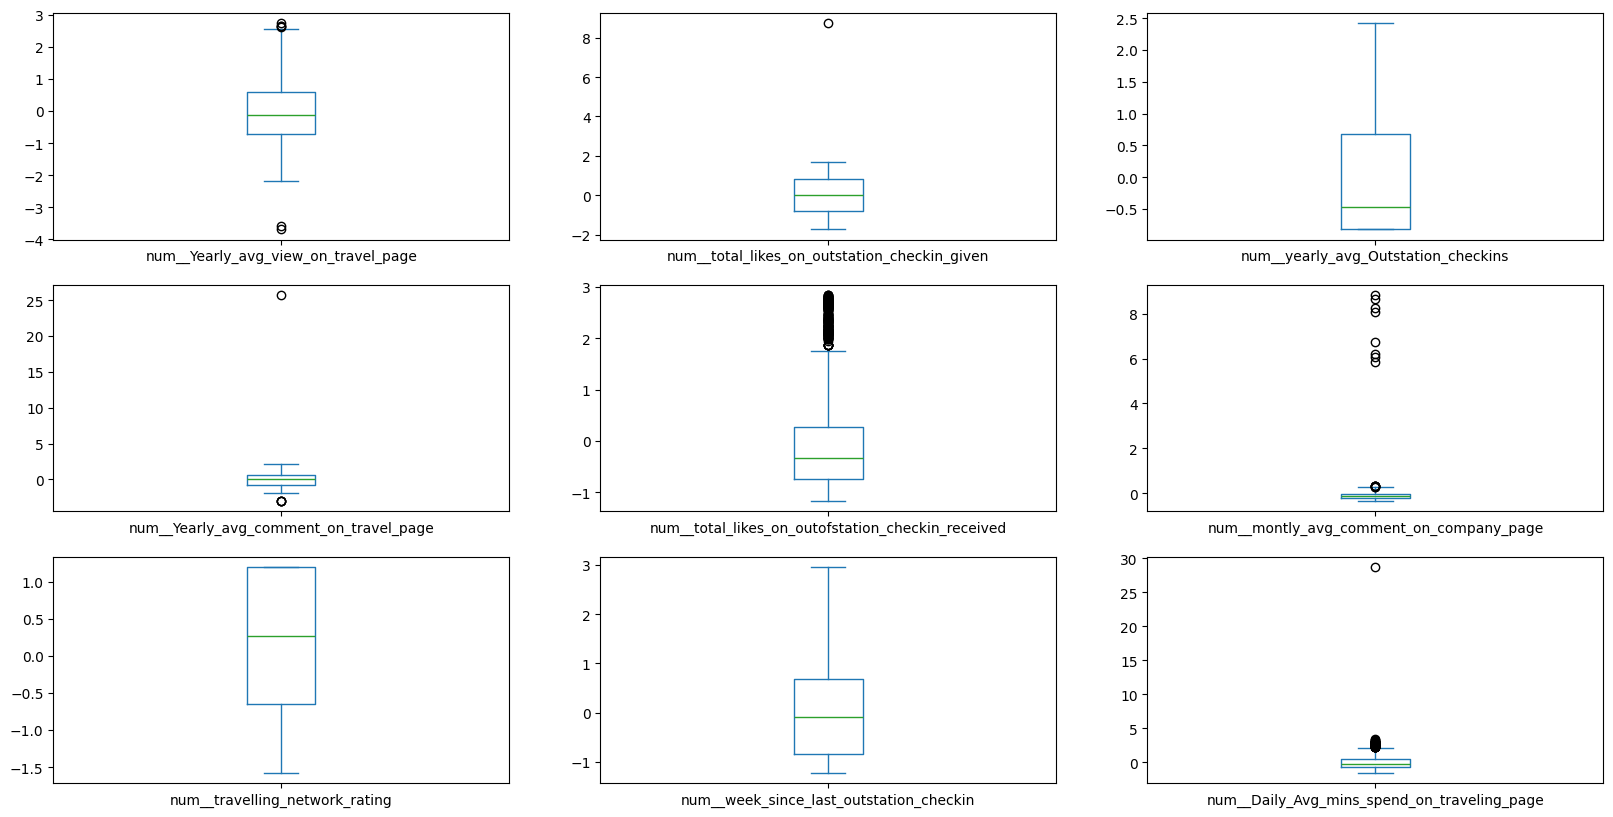

In [422]:
# boxplots to view outlier removal

# X_test_mobile_0
X_test_mobile_0[numerical_X_test_mobile_0].plot(kind='box',subplots=True,sharex=False,sharey=False,layout=(3,3),figsize=(20,10))

plt.show()

In [424]:
# It can be seen that isolation forest has not removed all the outliers from the numerical features.
# The ensemble model detects outliers based on the contamination rate.
# Initially the model when fitted on a dataset assigns the anomaly score to each data points based on the position of the data point (leaf) from the root.
# If the path is shorter it means it took fewer splits to isolate the specific data point.
# This data point with the shortest path will be assigned the highest anomaly score.
# Isolation forest functions by picking a random feature creating a split at a value inbetween the min and max value of the feature and further splitting
# until all the data points are isolated and represented by an individual leaf.
# If the path length from root to the data point(leaf) is very high, suggests that the datapoint has high similarity with the other datapoints

# A contamination rate of 0.05 considers the top 5% of the outliers (isolated_data points) as outliers.
# A contamination rate of 5% strike a balance between detection and overfitting. It identified enough outliers and does not end up classifying a normal
# data point as an outlier. Since most of the features were either moderately or heavily skewed the 5% rate could help mitigate them.

# Column Characteristics: Isolation Forest operates independently on each feature (column) of the dataset. If certain columns have characteristics 
# that make them less sensitive to isolation (e.g., low variability, high density of data points), outliers in those columns may not be detected
# effectively.


In [425]:
# dummy classifier
from sklearn.dummy import DummyClassifier

majority_class_classifier=DummyClassifier(strategy='most_frequent')
majority_class_classifier.fit(X_train_laptop_0,y_train_laptop_0)
print('The baseline score for laptop_model using Dummy Classifier with preprocessing technique 0 is',majority_class_classifier.score(X_test_laptop_0,y_test_laptop_0))

majority_class_classifier=DummyClassifier(strategy='most_frequent')
majority_class_classifier.fit(X_train_laptop_1,y_train_laptop_1)
print('The baseline score for laptop_model using Dummy Classifier with preprocessing technique 1 is',majority_class_classifier.score(X_test_laptop_1,y_test_laptop_1))

majority_class_classifier=DummyClassifier(strategy='most_frequent')
majority_class_classifier.fit(X_train_mobile_0,y_train_mobile_0)
print('The baseline score for mobile_model using Dummy Classifier with preprocessing technique 0 is',majority_class_classifier.score(X_test_mobile_0,y_test_mobile_0))

majority_class_classifier=DummyClassifier(strategy='most_frequent')
majority_class_classifier.fit(X_train_mobile_1,y_train_mobile_1)
print('The baseline score for mobile_model using Dummy Classifier with preprocessing technique 1 is',majority_class_classifier.score(X_test_mobile_1,y_test_mobile_1))

The baseline score for laptop_model using Dummy Classifier with preprocessing technique 0 is 0.7703349282296651
The baseline score for laptop_model using Dummy Classifier with preprocessing technique 1 is 0.7735849056603774
The baseline score for mobile_model using Dummy Classifier with preprocessing technique 0 is 0.8630746416213544
The baseline score for mobile_model using Dummy Classifier with preprocessing technique 1 is 0.8656126482213439


In [493]:
# baseline scores usign Logistic Regressor, SVC AND RF

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,cohen_kappa_score
import xgboost as xgb
import lightgbm as lgb

accuracy_scores=[]
cohen_kappa_scores=[]
device_model=[]
preprocessing_technique=[]
ml_model=[]

train_sets=[('Laptop_model','Preprocessing_0',X_train_laptop_0,y_train_laptop_0,X_test_laptop_0,y_test_laptop_0),
           ('Laptop_model','Preprocessing_1',X_train_laptop_1,y_train_laptop_1,X_test_laptop_1,y_test_laptop_1),
           ('Mobile_model','Preprocessing_0',X_train_mobile_0,y_train_mobile_0,X_test_mobile_0,y_test_mobile_0),
           ('Mobile_model','Preprocessing_1',X_train_mobile_1,y_train_mobile_1,X_test_mobile_1,y_test_mobile_1)]
models=[('RF',RandomForestClassifier(random_state=42)),
       ('LR',LogisticRegression()),('SVC',SVC()),('XGB',xgb.XGBClassifier(random_state=42,verbosity=0)),('LGB',lgb.LGBMClassifier(random_state=42,
                                                                                                                                 verbosity=-1))]

for i in models:
    model=i[1]
    for j in train_sets:
        ml_model.append(i[0])
        device_model.append(j[0])
        preprocessing_technique.append(j[1])
        model.fit(j[2],j[3])
        accuracy_scores.append(accuracy_score(j[5],model.predict(j[4])))
        cohen_kappa_scores.append(cohen_kappa_score(j[5],model.predict(j[4])))

Baseline_validation=pd.DataFrame({'Device_model':device_model,'Preprocessing':preprocessing_technique,'Model':ml_model,'Accuracy':accuracy_scores,
                                  'CK_score':cohen_kappa_scores})
Baseline_validation.style.background_gradient()

,Device_model,Preprocessing,Model,Accuracy,CK_score
0,Laptop_model,Preprocessing_0,RF,0.990431,0.972554
1,Laptop_model,Preprocessing_1,RF,0.990566,0.972666
2,Mobile_model,Preprocessing_0,RF,0.981710,0.918273
3,Mobile_model,Preprocessing_1,RF,0.983202,0.924021
4,Laptop_model,Preprocessing_0,LR,0.846890,0.501714
5,Laptop_model,Preprocessing_1,LR,0.849057,0.485749
6,Mobile_model,Preprocessing_0,LR,0.885813,0.339273
7,Mobile_model,Preprocessing_1,LR,0.882411,0.260234
8,Laptop_model,Preprocessing_0,SVC,0.904306,0.683237
9,Laptop_model,Preprocessing_1,SVC,0.896226,0.652563


In [443]:
# based on baseline validation scores we can identify the high perfimng model
# RF performs good in terms of accuracy and cohen kappa score for both laptop models and mobile models. The preprocessing technique
# s very minute variations in model performance with preprocessing_1 based model performing better than preprocessing_0.
# Further hyperparameter tuning could iprove the models performance. A higher cohen kappa score indicates a very strong agreement betweent the actual and
# predicted labels. The cohen kappa score is a robust metric that also takes into consideration the possibility of predictions made by random chance.
# A higher ck score provides and approriate measure to indicate high confidence and reliability on trained model.

# LR and SVC has significantly lower performance than RF models for both laptop and mobile models. 
# LR has fewer hyperparameters thus any model improvements relying on hyperparameter tuning may be irrelevant.
# The cohen kappa score also suggests that event though the accuracy is considerably high the general aggreement between the prediction and actual labels
# are quite low suggesting random chance based predictions.
# SVC shows similar performance but with much worse ck score siggesting predicitons made are much worse than those made by random chance.
# SVC can be hyperparamter tuned to utilize its true potential, especially kernel selection and regularization
# The preprocessing technique has influenced the SVC model for mobile.
# Ensembling could be an optimal choice but may not be necessary or useful in the given scenario

# upon evaluating XGB AND LGB models we can see that both the models perform really well on both laptop and mobile datasets with either of the preprocessing
# techniques suggesting that these models capture the maximum variability in the dataset. LGB model for the laptop dataset preprocesed using preprocessing
# technique 0 provide a perfect accuracy and ck score when validated on the cohen kappa score. 
# In the case of these models it would be worthwhile conducting validation using cvs to understand the robust and generalizing nature of the model when
# used to predict new datas. By averaging the performance metrics accross different folds of data we can establish a reliable performance estimate with
# reduced variance as compared to using a single train test split dataset.
# cvs can help understand the bias variance transform while keeping track of the performance metric. If the performance of the LGB and XGB models are
# a result of overfitting it would be indicated by a larger discrepency in the performanc emetrics accross different folds of validation which is an
# indication of high variance 

In [459]:
# CVS for xgb lgb models
# baseline scores usign Logistic Regressor, SVC AND RF

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold,cross_val_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,cohen_kappa_score
import xgboost as xgb
import lightgbm as lgb

cvs_accuracy_score_0=[]
cvs_accuracy_score_1=[]
cvs_accuracy_score_2=[]
cvs_accuracy_score_3=[]
cvs_accuracy_score_4=[]
cvs_accuracy_scores_mean=[]
cohen_kappa_scores=[]
device_model=[]
preprocessing_technique=[]
ml_model=[]

cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

train_sets=[('Laptop_model','Preprocessing_0',X_train_laptop_0,y_train_laptop_0,X_test_laptop_0,y_test_laptop_0),
           ('Laptop_model','Preprocessing_1',X_train_laptop_1,y_train_laptop_1,X_test_laptop_1,y_test_laptop_1),
           ('Mobile_model','Preprocessing_0',X_train_mobile_0,y_train_mobile_0,X_test_mobile_0,y_test_mobile_0),
           ('Mobile_model','Preprocessing_1',X_train_mobile_1,y_train_mobile_1,X_test_mobile_1,y_test_mobile_1)]
models=[('XGB',xgb.XGBClassifier(random_state=42,verbosity=0)),('LGB',lgb.LGBMClassifier(random_state=42,verbosity=-1))]

for i in models:
    model=i[1]
    for j in train_sets:
        ml_model.append(i[0])
        device_model.append(j[0])
        preprocessing_technique.append(j[1])
        cvs=cross_val_score(model,j[2],j[3],cv=cv,n_jobs=-1)
        cvs_accuracy_score_0.append(cvs[0])
        cvs_accuracy_score_1.append(cvs[1])
        cvs_accuracy_score_2.append(cvs[2])
        cvs_accuracy_score_3.append(cvs[3])
        cvs_accuracy_score_4.append(cvs[4])
        cvs_accuracy_scores_mean.append(cvs.mean())

Baseline_validation_cvs_accuracy=pd.DataFrame({'Device_model':device_model,'Preprocessing':preprocessing_technique,'Model':ml_model,
                                      'cvs_Accuracy_0':cvs_accuracy_score_0,
                                      'cvs_Accuracy_1':cvs_accuracy_score_1,
                                      'cvs_Accuracy_2':cvs_accuracy_score_2,
                                      'cvs_Accuracy_3':cvs_accuracy_score_3,
                                      'cvs_Accuracy_4':cvs_accuracy_score_4,
                                  'cvs_Accuracy_mean':cvs_accuracy_scores_mean	})
Baseline_validation_cvs_accuracy.style.background_gradient()

,Device_model,Preprocessing,Model,cvs_Accuracy_0,cvs_Accuracy_1,cvs_Accuracy_2,cvs_Accuracy_3,cvs_Accuracy_4,cvs_Accuracy_mean
0,Laptop_model,Preproccessing_0,XGB,0.964497,0.940476,0.982143,0.982143,0.946429,0.963138
1,Laptop_model,Preproccessing_1,XGB,0.982249,0.964286,0.976190,0.988095,0.994048,0.980974
2,Mobile_model,Preproccessing_0,XGB,0.985176,0.980235,0.980235,0.988882,0.983941,0.983694
3,Mobile_model,Preproccessing_1,XGB,0.987029,0.990117,0.979617,0.983323,0.987029,0.985423
4,Laptop_model,Preproccessing_0,LGB,0.970414,0.988095,0.988095,1.000000,0.940476,0.977416
5,Laptop_model,Preproccessing_1,LGB,0.994083,0.976190,0.970238,0.994048,0.994048,0.985721
6,Mobile_model,Preproccessing_0,LGB,0.967881,0.965411,0.977146,0.980852,0.977146,0.973687
7,Mobile_model,Preproccessing_1,LGB,0.975911,0.972823,0.970970,0.980852,0.974676,0.975046


In [461]:
# CVS for xgb lgb models using scoring as cohen kappa score
# baseline scores usign Logistic Regressor, SVC AND RF

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold,cross_val_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,cohen_kappa_score,make_scorer
import xgboost as xgb
import lightgbm as lgb

cvs_cohen_score_0=[]
cvs_cohen_score_1=[]
cvs_cohen_score_2=[]
cvs_cohen_score_3=[]
cvs_cohen_score_4=[]
cvs_cohen_scores_mean=[]
cohen_kappa_scores=[]
device_model=[]
preprocessing_technique=[]
ml_model=[]

cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

def kappa_score(y_true,y_pred):
    score=cohen_kappa_score(y_true,y_pred)
    return score

custom_score=make_scorer(kappa_score)

train_sets=[('Laptop_model','Preprocessing_0',X_train_laptop_0,y_train_laptop_0,X_test_laptop_0,y_test_laptop_0),
           ('Laptop_model','Preprocessing_1',X_train_laptop_1,y_train_laptop_1,X_test_laptop_1,y_test_laptop_1),
           ('Mobile_model','Preprocessing_0',X_train_mobile_0,y_train_mobile_0,X_test_mobile_0,y_test_mobile_0),
           ('Mobile_model','Preprocessing_1',X_train_mobile_1,y_train_mobile_1,X_test_mobile_1,y_test_mobile_1)]
models=[('XGB',xgb.XGBClassifier(random_state=42,verbosity=0)),('LGB',lgb.LGBMClassifier(random_state=42,verbosity=-1))]

for i in models:
    model=i[1]
    for j in train_sets:
        ml_model.append(i[0])
        device_model.append(j[0])
        preprocessing_technique.append(j[1])
        cvs=cross_val_score(model,j[2],j[3],cv=cv,n_jobs=-1,scoring=custom_score)
        cvs_cohen_score_0.append(cvs[0])
        cvs_cohen_score_1.append(cvs[1])
        cvs_cohen_score_2.append(cvs[2])
        cvs_cohen_score_3.append(cvs[3])
        cvs_cohen_score_4.append(cvs[4])
        cvs_cohen_scores_mean.append(cvs.mean())

Baseline_validation_cvs_cohen=pd.DataFrame({'Device_model':device_model,'Preprocessing':preprocessing_technique,'Model':ml_model,
                                      'cvs_Cohen_score_0':cvs_cohen_score_0,
                                      'cvs_Cohen_score_1':cvs_cohen_score_1,
                                      'cvs_Cohen_score_2':cvs_cohen_score_2,
                                      'cvs_Cohen_score_3':cvs_cohen_score_3,
                                      'cvs_Cohen_score_4':cvs_cohen_score_4,
                                  'cvs_cohen_mean':cvs_cohen_scores_mean	})
Baseline_validation_cvs_cohen.style.background_gradient()

,Device_model,Preprocessing,Model,cvs_Cohen_score_0,cvs_Cohen_score_1,cvs_Cohen_score_2,cvs_Cohen_score_3,cvs_Cohen_score_4,cvs_cohen_mean
0,Laptop_model,Preproccessing_0,XGB,0.901820,0.838679,0.952000,0.952756,0.846154,0.898282
1,Laptop_model,Preproccessing_1,XGB,0.952850,0.903226,0.935484,0.968254,0.984252,0.948813
2,Mobile_model,Preproccessing_0,XGB,0.941903,0.919850,0.920402,0.956135,0.936210,0.934900
3,Mobile_model,Preproccessing_1,XGB,0.948731,0.961004,0.917759,0.933180,0.948906,0.941916
4,Laptop_model,Preproccessing_0,LGB,0.917505,0.967194,0.967742,1.000000,0.836066,0.937701
5,Laptop_model,Preproccessing_1,LGB,0.984031,0.936508,0.918699,0.984252,0.984000,0.961498
6,Mobile_model,Preproccessing_0,LGB,0.866988,0.855218,0.906842,0.923029,0.908757,0.892167
7,Mobile_model,Preproccessing_1,LGB,0.900392,0.888217,0.879959,0.922750,0.896760,0.897615


In [465]:
# based on cross validation score obtained for both XGB and LGB models using both preprocessing techniques we can make strong inferences on possible
# overfitting.

# The overall accuracy and cohen kappa score has reduced very slightly in comparison to model scores evaluated on predicitons made using models trained
# by the entire training set. This reduction may be due to loss of information while creating the folds wehre the new folds may not fully capture
# certain part of the original dist patterns.

# The consistent accuracy score accross all folds for XGB and LGB based models suggest that the models are not overfitting on the data and is quite 
# robust, expected to generalize well to new data.
# Based on accuracy as a scoring metric Laptop model using the LGB booster model trained on the dataset preprocesed using preproccessing_1 shows the best
# performance accross all the folds with the lowest variance among accuracy scores and a mean accuracy of 98.5%
# Based on accuracy as a scoring metric Mobile model using the XGB booster model trained on the dataset preprocesed using preproccessing_1 shows the best
# performance accross all the folds with the lowest variance among accuracy scores and a mean accuracy of 98.5%

# The cohen kappa score penalizes random chance based predictions and provides a definite evaluation on the agreement between the actual and prediction
# labels. Thus the score has reduced slightly for each fold incomparison to a model trained on the entire dataset. The reduction observed is slightly
# higher than the reduction observed in folds evaluated by accuracy score is due to the possibilty of incomplete representation of pattern distributions
# of features within each fold.
# The overall variance among the cohen kappa scores accross all folds for both xgb and lgb models is quite low (max of 0.1) which is acceptable to conclude
# that there is no overfitting. The clear indication of lack of overfitting based on cvs using accuracy score supports the inference based on the ck scores.

# The models do not overfit to the training data
# Preprocessing_1 can be used as a preprocessing technique for the dataset in training both xgb and lgb models, providing a robust final model

In [466]:
# plan

# rf xgb lgb model are high performing models
# rf has slighlty lower (not bad) performance than xgb and lgb models
# hyperparameter tune rf using gridsearch
# Analyse the xgb lgb models using classification metrics, roc curves and understand the correctness and other relevant metrics of the model
# Accuracy of the xgb lgb models are quite high at 99% but the cohen kappa score is at 95%
# Based on the classificatino report we can try and tune the mdoel to perform better in terms of cohen kappa score to penalize the possibility of random 
# chance based predictions.
# Even though the cvs has indicated that there has been no potential overfitting we could ensemble all three models to create a more generalized model 
# with a higher cohen kappa score
# No featue engineering required further

In [472]:
# hyperparameter tune the rf model (preprocesing_1)
from sklearn.model_selection import GridSearchCV,StratifiedKFold

# laptop


cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

param_grid={'n_estimators':[100,120,150],
            'max_depth':[None,6,10],
            'min_samples_split':[2,5,10]}
model=RandomForestClassifier(random_state=42)
grid_model_laptop=GridSearchCV(model,param_grid,cv=cv,n_jobs=-1)
grid_model_laptop.fit(X_train_laptop_1,y_train_laptop_1)


# mobile


from sklearn.model_selection import GridSearchCV,StratifiedKFold

cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

grid_params={'n_estimators':[100,120,150],
            'max_depth':[None,6,10],
            'min_samples_split':[2,5,10]}
model=RandomForestClassifier(random_state=42)
grid_model_mobile=GridSearchCV(model,param_grid,cv=cv,n_jobs=-1)
grid_model_mobile.fit(X_train_mobile_1,y_train_mobile_1)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 6, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 120, 150]})

In [495]:
# baseline scores usign Logistic Regressor, SVC AND RF

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,cohen_kappa_score
import xgboost as xgb
import lightgbm as lgb

accuracy_scores=[]
cohen_kappa_scores=[]
device_model=[]
preprocessing_technique=[]
ml_model=[]

train_sets=[
           ('Laptop_model_grid','Preprocessing_1',X_train_laptop_1,y_train_laptop_1,X_test_laptop_1,y_test_laptop_1,grid_model_laptop.best_params_),
           ('Mobile_model_grid','Preprocessing_1',X_train_mobile_1,y_train_mobile_1,X_test_mobile_1,y_test_mobile_1,grid_model_mobile.best_params_)]
models=('RF',RandomForestClassifier)

for j in train_sets:
    model=models[1](random_state=42,**j[6])
    ml_model.append(models[0])
    device_model.append(j[0])
    preprocessing_technique.append(j[1])
    model.fit(j[2],j[3])
    accuracy_scores.append(accuracy_score(j[5],model.predict(j[4])))
    cohen_kappa_scores.append(cohen_kappa_score(j[5],model.predict(j[4])))

grid_rf=pd.DataFrame({'Device_model':device_model,'Preprocessing':preprocessing_technique,'Model':ml_model,'Accuracy':accuracy_scores,
                                  'CK_score':cohen_kappa_scores})
prior_grid=Baseline_validation[(Baseline_validation['Model']=='RF')&(Baseline_validation['Preprocessing']=='Preprocessing_1')]
grid_rf=pd.concat([grid_rf,prior_grid],axis=0)
grid_rf

,Device_model,Preprocessing,Model,Accuracy,CK_score
0,Laptop_model_grid,Preprocessing_1,RF,0.990566,0.972666
1,Mobile_model_grid,Preprocessing_1,RF,0.983202,0.924021
1,Laptop_model,Preprocessing_1,RF,0.990566,0.972666
3,Mobile_model,Preprocessing_1,RF,0.983202,0.924021


In [507]:
# no further improvements noticed in any of the scores

Classification Report- Laptop
-----------------------------

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       164
           1       0.98      0.96      0.97        48

    accuracy                           0.99       212
   macro avg       0.98      0.98      0.98       212
weighted avg       0.99      0.99      0.99       212


---------------------------------------------------------------------------

visual plots - Laptop
-----------------------------



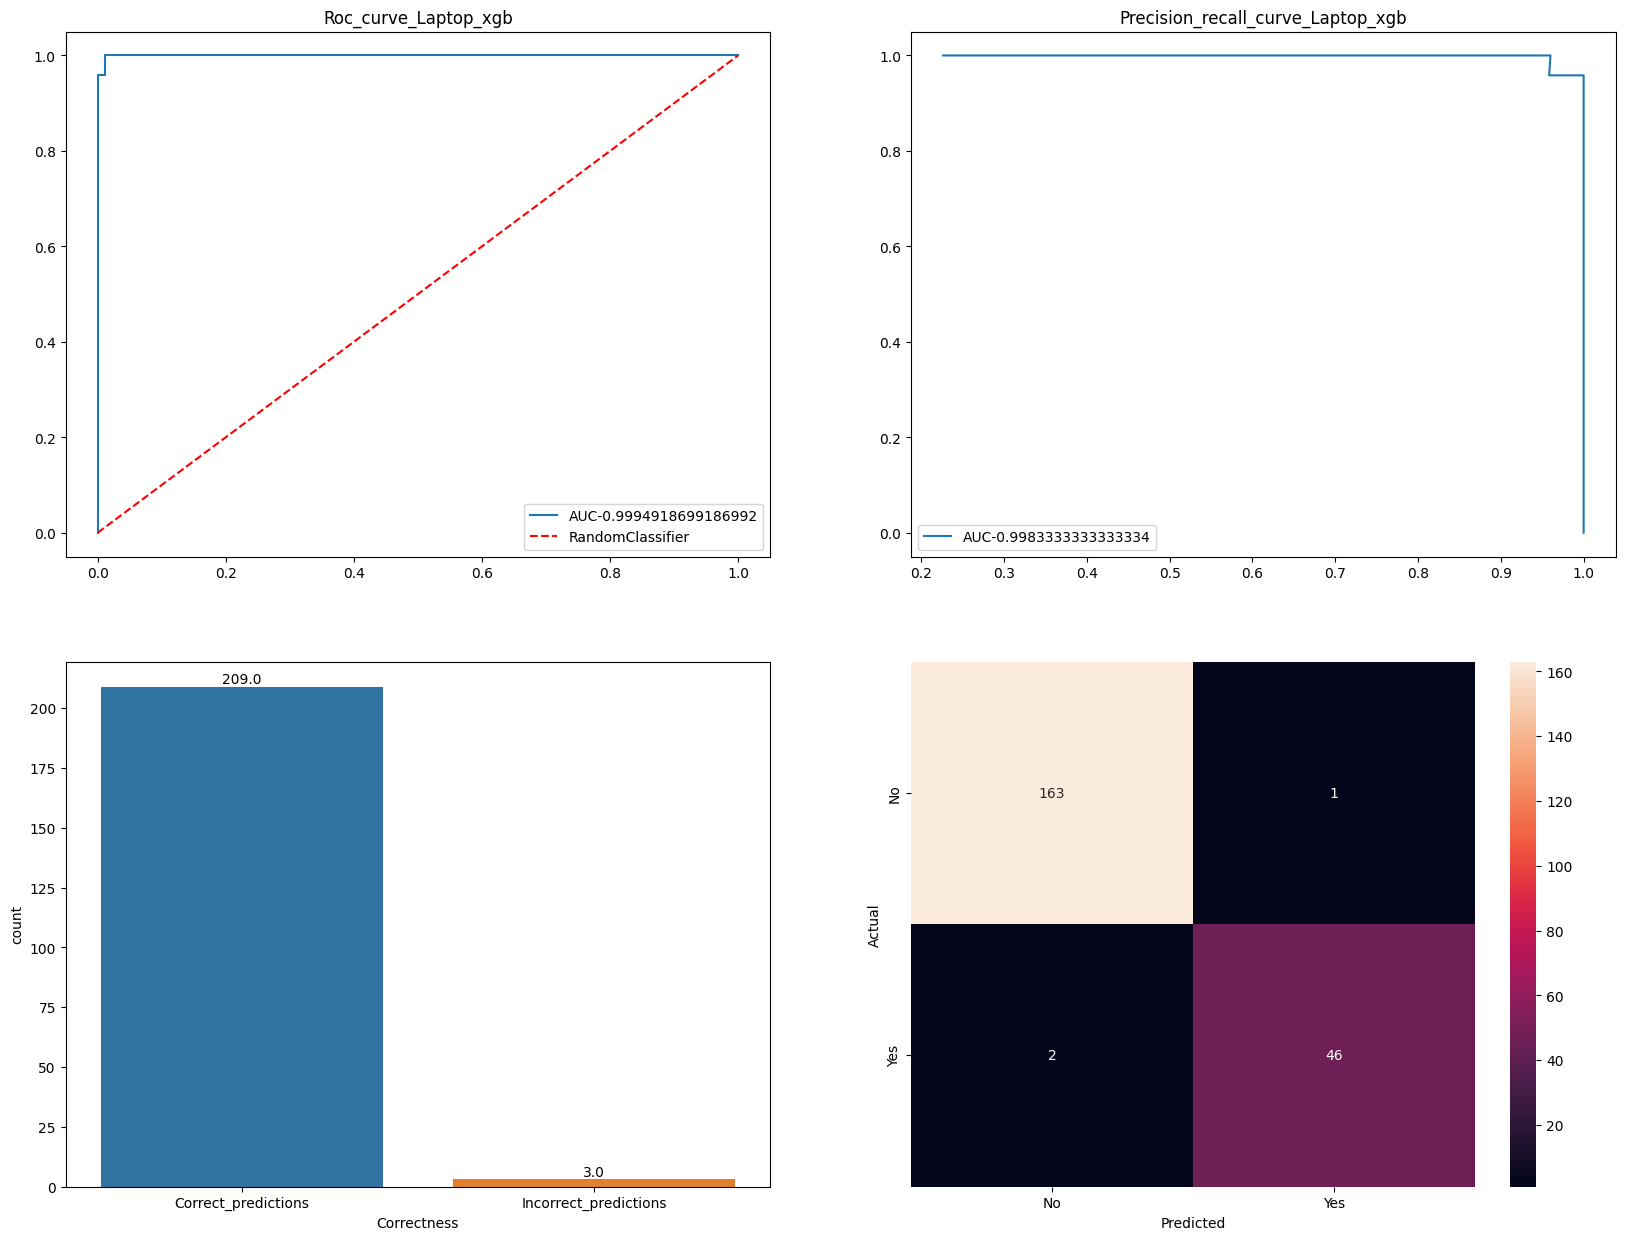

In [631]:
# evaluating XGB performance for laptop

from sklearn.metrics import classification_report,confusion_matrix

model=xgb.XGBClassifier(random_state=42)
model.fit(X_train_laptop_1,y_train_laptop_1)
print('Classification Report- Laptop')
print('-----------------------------\n')
print(classification_report(y_test_laptop_1,model.predict(X_test_laptop_1)))
print('\n---------------------------------------------------------------------------\n')
print('visual plots - Laptop')
print('-----------------------------\n')

def conf_model(y_true,y_pred):
    confusion_m=confusion_matrix(y_true,y_pred)
    matrix=sns.heatmap(data=confusion_m,xticklabels=['No','Yes'],yticklabels=['No','Yes'],annot=True,fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    return matrix



# roc curve to visualize recall precision trade off XGB LAPTOP
from sklearn.metrics import roc_auc_score,roc_curve,precision_recall_curve,average_precision_score

fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(20,15))
axes=axes.flatten()


y_predict_prob=model.predict_proba(X_test_laptop_1)[:,1]
fpr,tpr,threshold_r=roc_curve(y_test_laptop_1,y_predict_prob)
auc=roc_auc_score(y_test_laptop_1,y_predict_prob)
axes[0].plot(fpr,tpr,label=f'AUC-{auc}')
axes[0].plot([0, 1], [0, 1], linestyle='--', color='r', label='RandomClassifier')
axes[0].legend()
axes[0].set_title('Roc_curve_Laptop_xgb')


precision,recall,threshold_p=precision_recall_curve(y_test_laptop_1,y_predict_prob)
ps=average_precision_score(y_test_laptop_1,y_predict_prob)
axes[1].plot(precision,recall,label=f'AUC-{ps}')
axes[1].legend()
axes[1].set_title('Precision_recall_curve_Laptop_xgb')


C=pd.DataFrame({'Actual':y_test_laptop_1,'Predicted':model.predict(X_test_laptop_1)})
correctness=[]
for index,row in C.iterrows():
    if row['Actual']==row['Predicted']:
        correctness.append('Correct_predictions')
    else:
        correctness.append('Incorrect_predictions')

C['Correctness']=correctness
ax=sns.countplot(data=C,x='Correctness',hue='Correctness',ax=axes[2])
for p in ax.patches:
    ax.text(p.get_x()+p.get_width()/2,p.get_height(),p.get_height(),va='bottom',ha='center')

bx=conf_model(y_test_laptop_1,model.predict(X_test_laptop_1))

pred_prob_laptop_xgb=model.predict_proba(X_test_laptop_1)[:,1]

Classification Report- Mobile
-----------------------------

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1752
           1       0.99      0.94      0.96       272

    accuracy                           0.99      2024
   macro avg       0.99      0.97      0.98      2024
weighted avg       0.99      0.99      0.99      2024


---------------------------------------------------------------------------

Visual plots- Mobile
-----------------------------



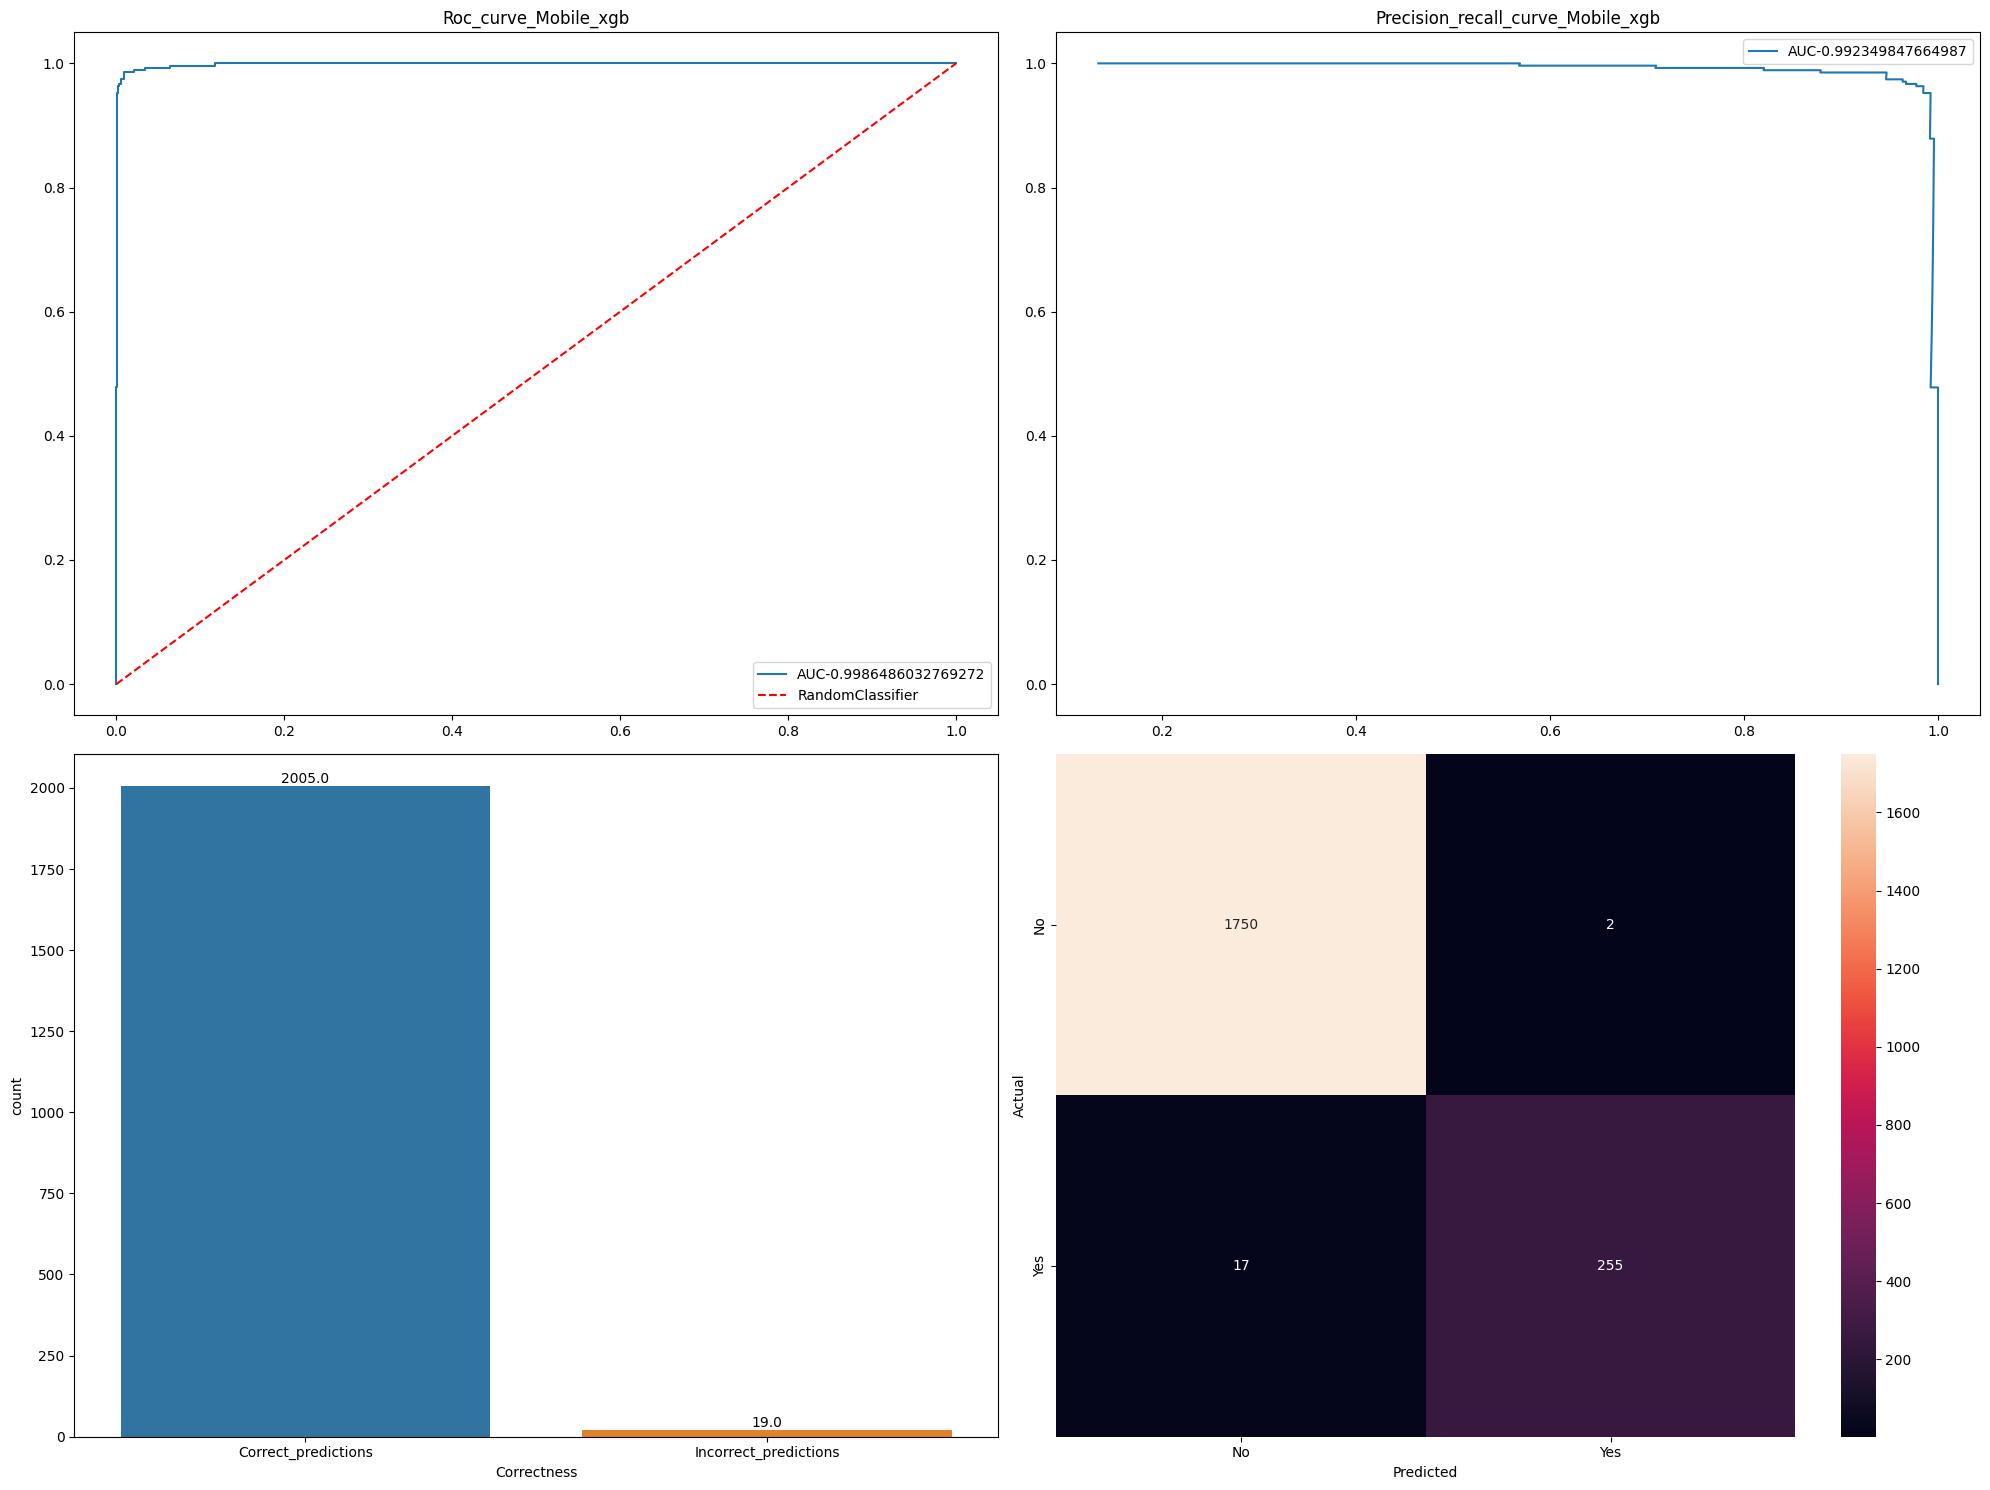

In [632]:
# evaluating XGB performance for mobile

from sklearn.metrics import classification_report,confusion_matrix

model=xgb.XGBClassifier(random_state=42)
model.fit(X_train_mobile_1,y_train_mobile_1)
print('Classification Report- Mobile')
print('-----------------------------\n')
print(classification_report(y_test_mobile_1,model.predict(X_test_mobile_1)))
print('\n---------------------------------------------------------------------------\n')
print('Visual plots- Mobile')
print('-----------------------------\n')


def conf_model(y_true,y_pred):
    confusion_m=confusion_matrix(y_true,y_pred)
    matrix=sns.heatmap(data=confusion_m,xticklabels=['No','Yes'],yticklabels=['No','Yes'],annot=True,fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    return matrix


from sklearn.metrics import roc_auc_score,roc_curve,precision_recall_curve,average_precision_score

fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(20,15))
axes=axes.flatten()


y_predict_prob=model.predict_proba(X_test_mobile_1)[:,1]
fpr,tpr,threshold_r=roc_curve(y_test_mobile_1,y_predict_prob)
auc=roc_auc_score(y_test_mobile_1,y_predict_prob)
axes[0].plot(fpr,tpr,label=f'AUC-{auc}')
axes[0].plot([0, 1], [0, 1], linestyle='--', color='r', label='RandomClassifier')
axes[0].legend()
axes[0].set_title('Roc_curve_Mobile_xgb')


precision,recall,threshold_p=precision_recall_curve(y_test_mobile_1,y_predict_prob)
ps=average_precision_score(y_test_mobile_1,y_predict_prob)
axes[1].plot(precision,recall,label=f'AUC-{ps}')
axes[1].legend()
axes[1].set_title('Precision_recall_curve_Mobile_xgb')



C=pd.DataFrame({'Actual':y_test_mobile_1,'Predicted':model.predict(X_test_mobile_1)})
correctness=[]
for index,row in C.iterrows():
    if row['Actual']==row['Predicted']:
        correctness.append('Correct_predictions')
    else:
        correctness.append('Incorrect_predictions')

C['Correctness']=correctness
ax=sns.countplot(data=C,x='Correctness',hue='Correctness',ax=axes[2])
for p in ax.patches:
    ax.text(p.get_x()+p.get_width()/2,p.get_height(),p.get_height(),va='bottom',ha='center')

bx=conf_model(y_test_mobile_1,model.predict(X_test_mobile_1))

plt.tight_layout()

pred_prob_mobile_xgb=model.predict_proba(X_test_mobile_1)[:,1]

Classification Report- Laptop
-----------------------------

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       164
           1       1.00      0.96      0.98        48

    accuracy                           0.99       212
   macro avg       0.99      0.98      0.99       212
weighted avg       0.99      0.99      0.99       212


---------------------------------------------------------------------------

visual plots - Laptop
-----------------------------



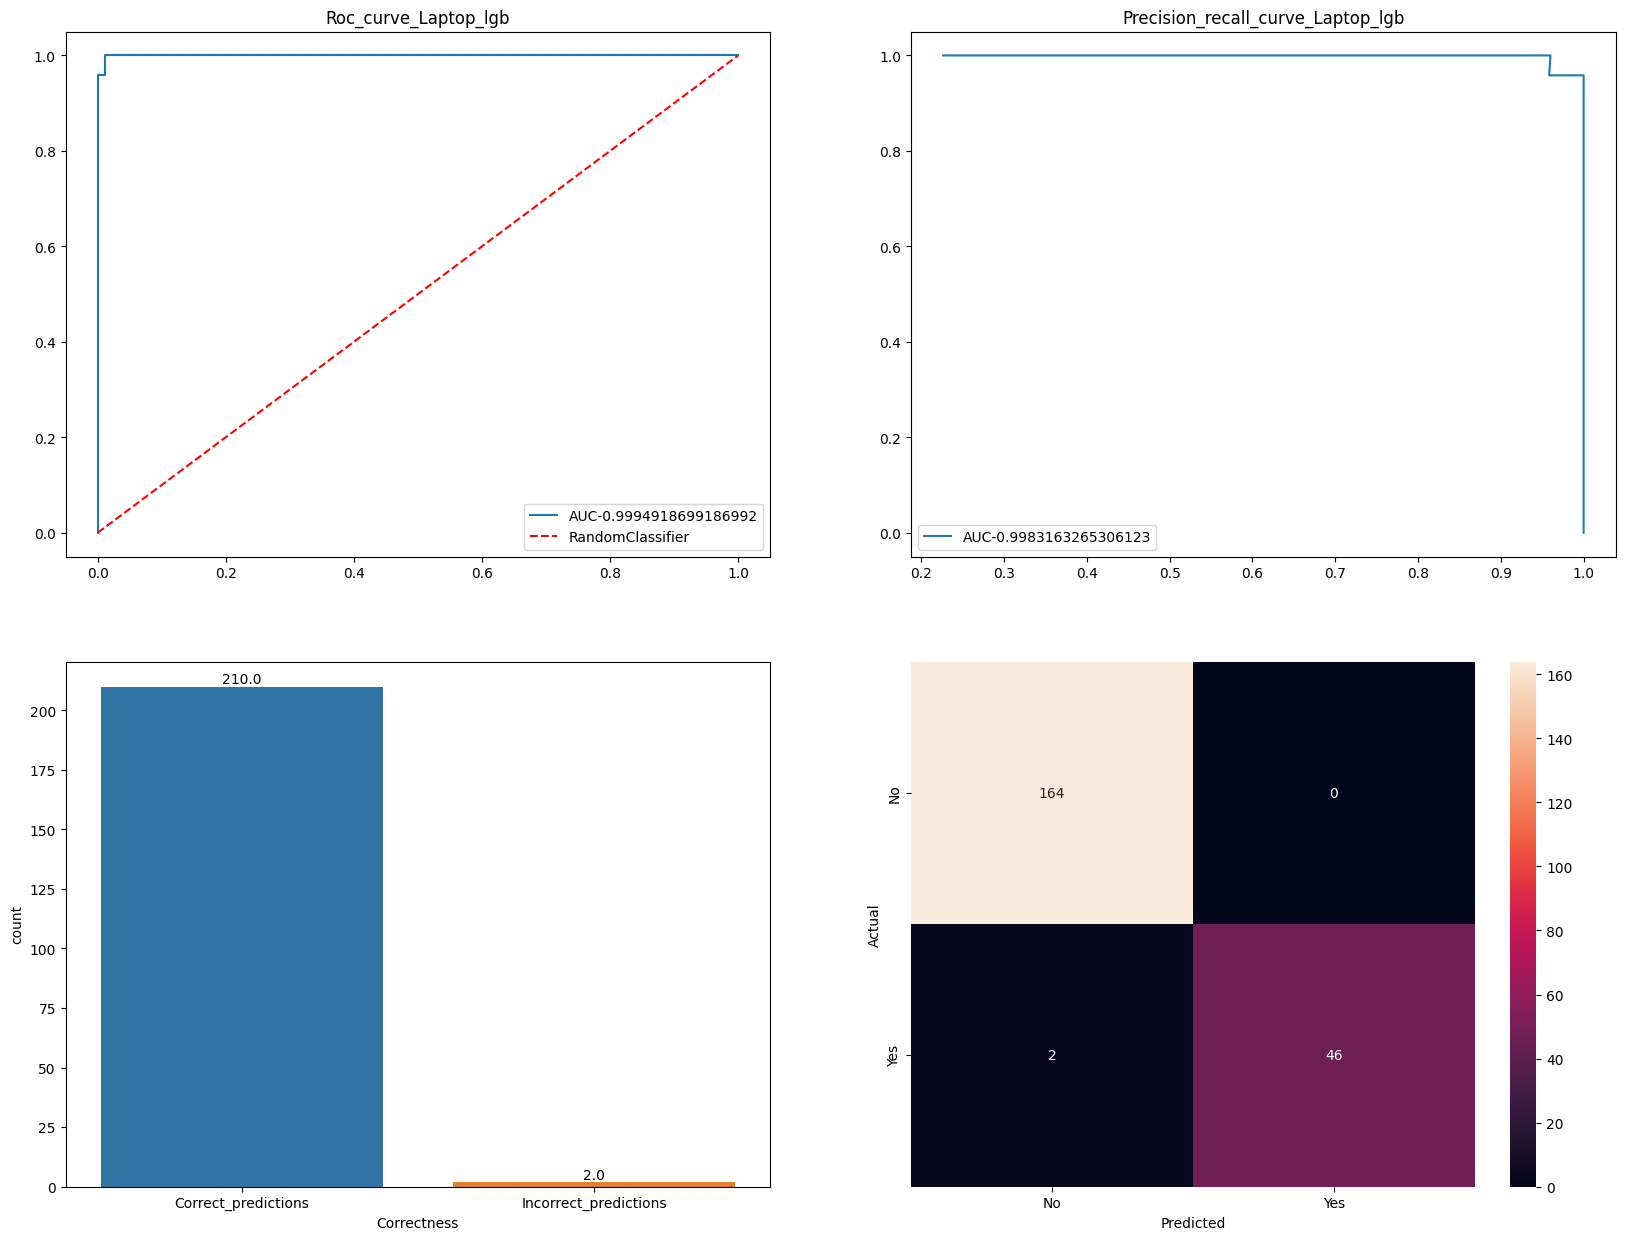

In [633]:
# evaluating LGB performance for laptop

from sklearn.metrics import classification_report,confusion_matrix

model=lgb.LGBMClassifier(random_state=42,verbosity=-1)
model.fit(X_train_laptop_1,y_train_laptop_1)
print('Classification Report- Laptop')
print('-----------------------------\n')
print(classification_report(y_test_laptop_1,model.predict(X_test_laptop_1)))
print('\n---------------------------------------------------------------------------\n')
print('visual plots - Laptop')
print('-----------------------------\n')


def conf_model(y_true,y_pred):
    confusion_m=confusion_matrix(y_true,y_pred)
    matrix=sns.heatmap(data=confusion_m,xticklabels=['No','Yes'],yticklabels=['No','Yes'],annot=True,fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    return matrix


from sklearn.metrics import roc_auc_score,roc_curve,precision_recall_curve,average_precision_score

fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(20,15))
axes=axes.flatten()


y_predict_prob=model.predict_proba(X_test_laptop_1)[:,1]
fpr,tpr,threshold_r=roc_curve(y_test_laptop_1,y_predict_prob)
auc=roc_auc_score(y_test_laptop_1,y_predict_prob)
axes[0].plot(fpr,tpr,label=f'AUC-{auc}')
axes[0].plot([0, 1], [0, 1], linestyle='--', color='r', label='RandomClassifier')
axes[0].legend()
axes[0].set_title('Roc_curve_Laptop_lgb')


precision,recall,threshold_p=precision_recall_curve(y_test_laptop_1,y_predict_prob)
ps=average_precision_score(y_test_laptop_1,y_predict_prob)
axes[1].plot(precision,recall,label=f'AUC-{ps}')
axes[1].legend()
axes[1].set_title('Precision_recall_curve_Laptop_lgb')



C=pd.DataFrame({'Actual':y_test_laptop_1,'Predicted':model.predict(X_test_laptop_1)})
correctness=[]
for index,row in C.iterrows():
    if row['Actual']==row['Predicted']:
        correctness.append('Correct_predictions')
    else:
        correctness.append('Incorrect_predictions')

C['Correctness']=correctness
ax=sns.countplot(data=C,x='Correctness',hue='Correctness',ax=axes[2])
for p in ax.patches:
    ax.text(p.get_x()+p.get_width()/2,p.get_height(),p.get_height(),va='bottom',ha='center')

bx=conf_model(y_test_laptop_1,model.predict(X_test_laptop_1))

pred_prob_laptop_lgb=model.predict_proba(X_test_laptop_1)[:,1]

Classification Report- Mobile
-----------------------------

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1752
           1       0.98      0.86      0.92       272

    accuracy                           0.98      2024
   macro avg       0.98      0.93      0.95      2024
weighted avg       0.98      0.98      0.98      2024


---------------------------------------------------------------------------

visual plots- Mobile
-----------------------------



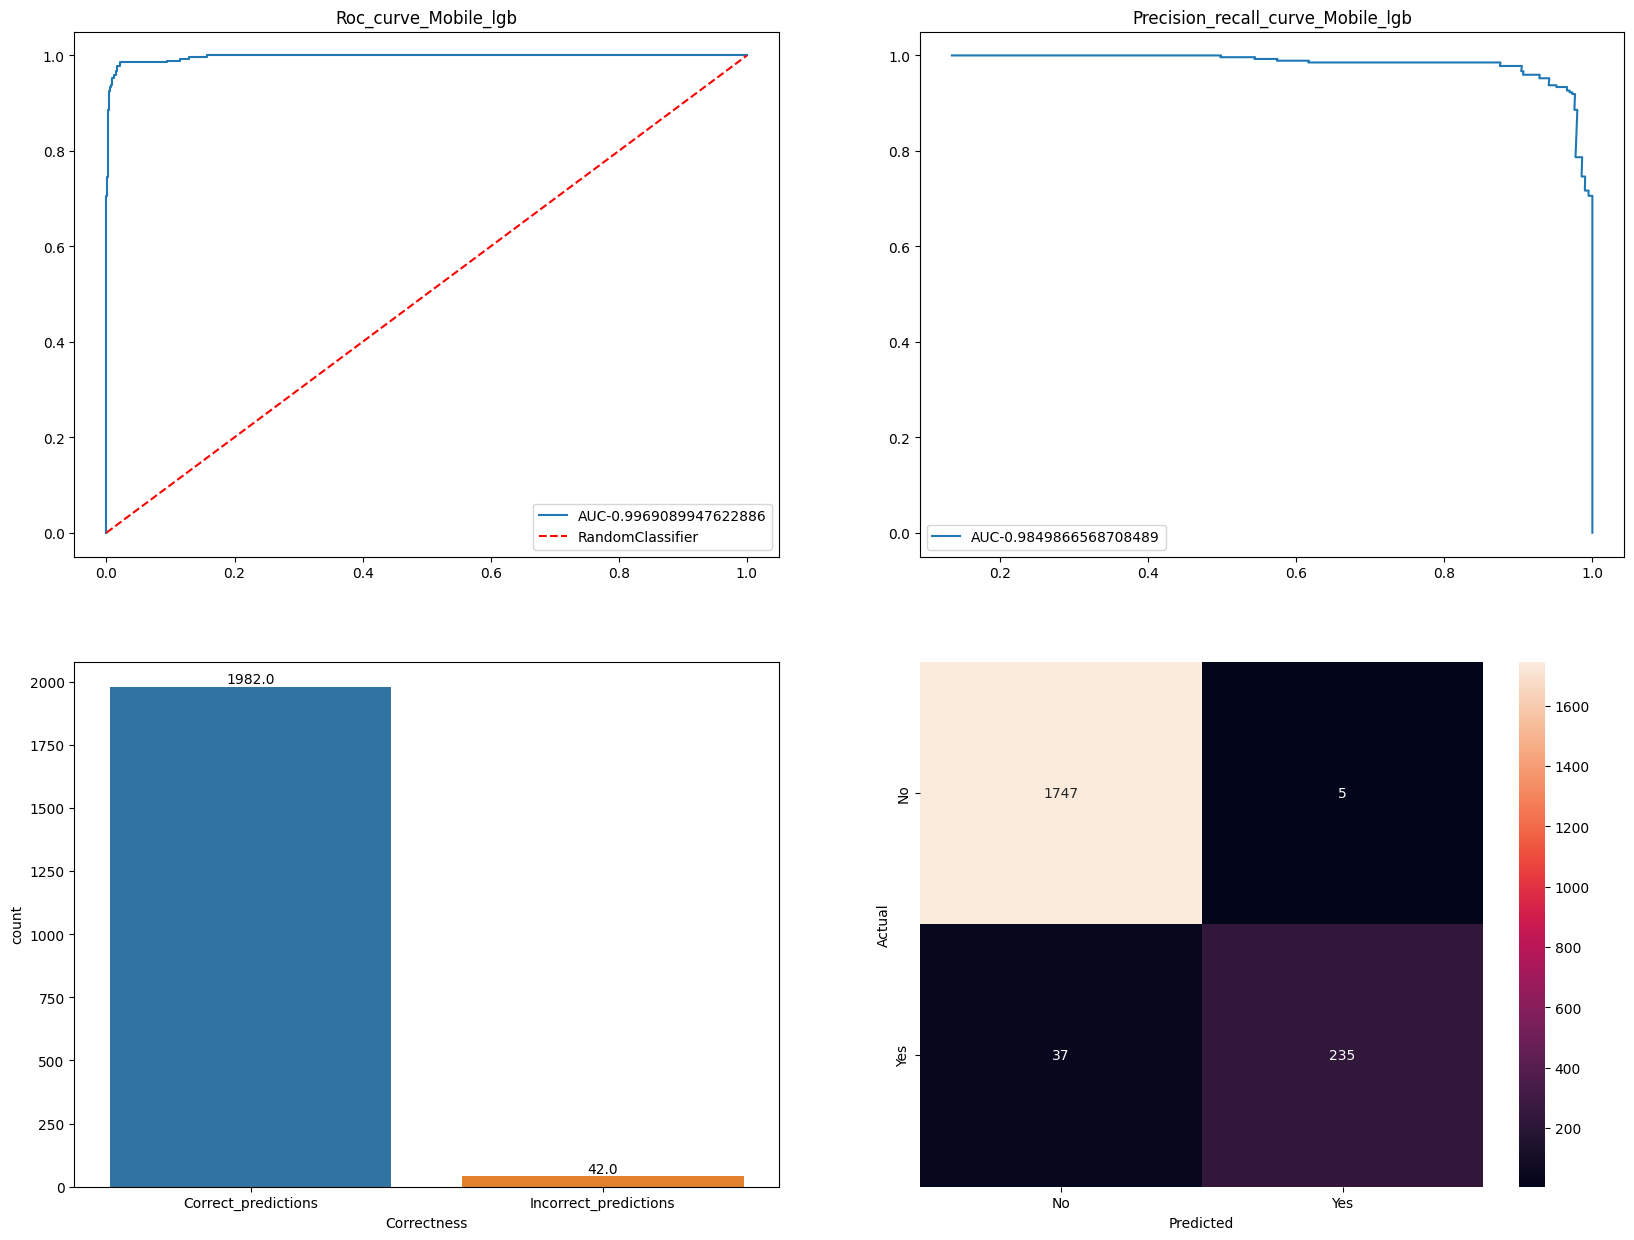

In [636]:
# evaluating lgb performance for mobile

from sklearn.metrics import classification_report,confusion_matrix

model=lgb.LGBMClassifier(random_state=42,verbosity=-1)
model.fit(X_train_mobile_1,y_train_mobile_1)
print('Classification Report- Mobile')
print('-----------------------------\n')
print(classification_report(y_test_mobile_1,model.predict(X_test_mobile_1)))
print('\n---------------------------------------------------------------------------\n')
print('visual plots- Mobile')
print('-----------------------------\n')


def conf_model(y_true,y_pred):
    confusion_m=confusion_matrix(y_true,y_pred)
    matrix=sns.heatmap(data=confusion_m,xticklabels=['No','Yes'],yticklabels=['No','Yes'],annot=True,fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    return matrix


# roc curve to visualize recall precision trade off XGB mobile
from sklearn.metrics import roc_auc_score,roc_curve,precision_recall_curve,average_precision_score

fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(20,15))
axes=axes.flatten()


y_predict_prob=model.predict_proba(X_test_mobile_1)[:,1]
fpr,tpr,threshold_r=roc_curve(y_test_mobile_1,y_predict_prob)
auc=roc_auc_score(y_test_mobile_1,y_predict_prob)
axes[0].plot(fpr,tpr,label=f'AUC-{auc}')
axes[0].plot([0, 1], [0, 1], linestyle='--', color='r', label='RandomClassifier')
axes[0].legend()
axes[0].set_title('Roc_curve_Mobile_lgb')


precision,recall,threshold_p=precision_recall_curve(y_test_mobile_1,y_predict_prob)
ps=average_precision_score(y_test_mobile_1,y_predict_prob)
axes[1].plot(precision,recall,label=f'AUC-{ps}')
axes[1].legend()
axes[1].set_title('Precision_recall_curve_Mobile_lgb')



C=pd.DataFrame({'Actual':y_test_mobile_1,'Predicted':model.predict(X_test_mobile_1)})
correctness=[]
for index,row in C.iterrows():
    if row['Actual']==row['Predicted']:
        correctness.append('Correct_predictions')
    else:
        correctness.append('Incorrect_predictions')

C['Correctness']=correctness
ax=sns.countplot(data=C,x='Correctness',hue='Correctness',ax=axes[2])
for p in ax.patches:
    ax.text(p.get_x()+p.get_width()/2,p.get_height(),p.get_height(),va='bottom',ha='center')

bx=conf_model(y_test_mobile_1,model.predict(X_test_mobile_1))

pred_prob_mobile_lgb=model.predict_proba(X_test_mobile_1)[:,1]

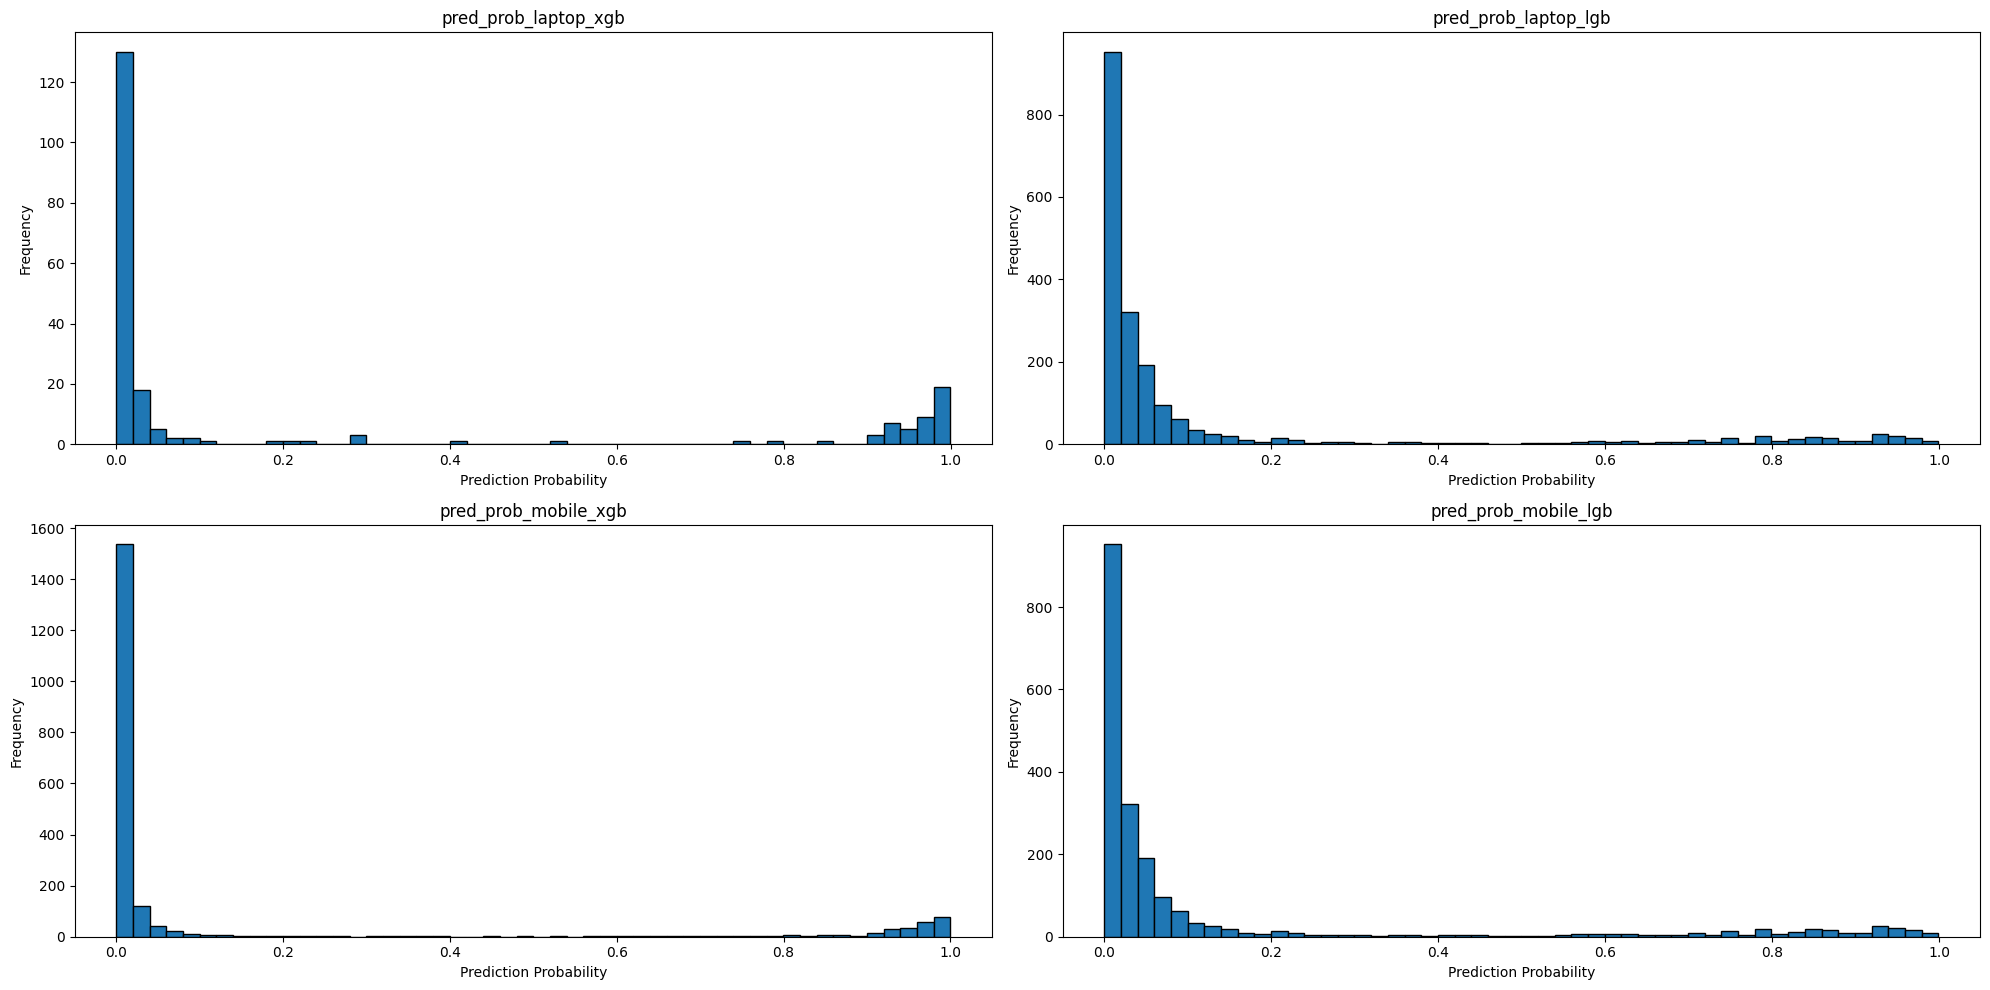

In [650]:
hist_pred_prob=[('pred_prob_laptop_xgb',pred_prob_laptop_xgb),
                 ('pred_prob_laptop_lgb',pred_prob_laptop_lgb),
                ('pred_prob_mobile_xgb',pred_prob_mobile_xgb),('pred_prob_mobile_lgb',pred_prob_mobile_lgb)]
fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(20,10))
axes=axes.flatten()
for i, prob in enumerate(hist_pred_prob):
    axes[i].hist(prob[1], bins=50, edgecolor='black')
    axes[i].set_title(prob[0])
    axes[i].set_xlabel('Prediction Probability')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [660]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score,cohen_kappa_score,log_loss

voting_type=[]
accuracy_scores=[]
cohen_kappa_scores=[]
logloss_scores=[]
model=[]
ml_model=[]


train_sets=[
           ('Laptop_model','XGB',X_train_laptop_1,y_train_laptop_1,X_test_laptop_1,y_test_laptop_1),
          
           ('Mobile_model','LGB',X_train_mobile_1,y_train_mobile_1,X_test_mobile_1,y_test_mobile_1)]

estimators=[('XGB',xgb.XGBClassifier(random_state=42,verbosity=0)),('LGB',lgb.LGBMClassifier(random_state=42,verbosity=-1)),
           ('RF',RandomForestClassifier(random_state=42))]
for j in train_sets:
    for i in ['hard','soft']:
        voting_type.append(i)
        model.append(j[0])
        ml_model.append(j[1])
        vtg_clf=VotingClassifier(estimators=estimators,voting=i)
        vtg_clf.fit(j[2],j[3])
        accuracy_scores.append(accuracy_score(j[5],vtg_clf.predict(j[4])))
        cohen_kappa_scores.append(cohen_kappa_score(j[5],vtg_clf.predict(j[4])))
        if i=='soft':
            pred_prob_normalized=vtg_clf.predict_proba(j[4])/np.sum(vtg_clf.predict_proba(j[4]),axis=1,keepdims=True)
            logloss_scores.append(log_loss(j[5],pred_prob_normalized))
        else:
            logloss_scores.append('--')

voting_scores=pd.DataFrame({'Model':model,'ml_Model':ml_model,'Voting_type':voting_type,'Accuracy_score':accuracy_scores,
                           'Cohen_scores':cohen_kappa_scores,'Logloss':logloss_scores})
voting_scores

,Model,ml_Model,Voting_type,Accuracy_score,Cohen_scores,Logloss
0,Laptop_model,XGB,hard,0.990566,0.972666,--
1,Laptop_model,XGB,soft,0.990566,0.972666,0.066843
2,Mobile_model,LGB,hard,0.987648,0.945120,--
3,Mobile_model,LGB,soft,0.989625,0.954195,0.065602


In [133]:
# using voting classifier
voting_clf=VotingClassifier(estimators=[('LogisticRegression',LogisticRegression()),
                                  ('DecisionTreeClassifier',DecisionTreeClassifier()),
                                  ('GaussianNB',GaussianNB()),('RandomForestClassifier',
                                RandomForestClassifier()),
                                   ('KNeighborsClassifier',KNeighborsClassifier()),
                                  ('XGBClassifier',XGBClassifier()),('SVC',SVC())])

# laptop model
cvs=cross_val_score(voting_clf,X_train_laptop_features,y_train_laptop_target_encoded)
print('\n\nVoting Classifier Laptop--',cvs)
print('\nVoting Classifier Laptop MEAN',cvs.mean())

# mobile model
cvs=cross_val_score(voting_clf,X_train_mobile_features,y_train_mobile_target_encoded)
print('\n\nVoting Classifier Mobile--',cvs)
print('\nVoting Classifier Mobile MEAN',cvs.mean())



Voting Classifier Laptop-- [0.95857988 0.93452381 0.9047619  0.95238095 0.92261905]

Voting Classifier Laptop MEAN 0.9345731191885038


Voting Classifier Mobile-- [0.97467573 0.94008647 0.9715874  0.95676343 0.96602841]

Voting Classifier Mobile MEAN 0.9618282890673255


In [134]:
# hyper tuning parameters
# how to find what all parameters are there in a model
from sklearn.ensemble import RandomForestClassifier
get_param=RandomForestClassifier().get_params()
get_param.keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'monotonic_cst', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [135]:
# hyper tuning parameters
# how to find what all parameters are there in a model
from xgboost import XGBClassifier
get_param=XGBClassifier().get_params()
get_param.keys()

dict_keys(['objective', 'base_score', 'booster', 'callbacks', 'colsample_bylevel', 'colsample_bynode', 'colsample_bytree', 'device', 'early_stopping_rounds', 'enable_categorical', 'eval_metric', 'feature_types', 'gamma', 'grow_policy', 'importance_type', 'interaction_constraints', 'learning_rate', 'max_bin', 'max_cat_threshold', 'max_cat_to_onehot', 'max_delta_step', 'max_depth', 'max_leaves', 'min_child_weight', 'missing', 'monotone_constraints', 'multi_strategy', 'n_estimators', 'n_jobs', 'num_parallel_tree', 'random_state', 'reg_alpha', 'reg_lambda', 'sampling_method', 'scale_pos_weight', 'subsample', 'tree_method', 'validate_parameters', 'verbosity'])

In [136]:
#multiple model testing
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
models=[RandomForestClassifier(),SVC(),LogisticRegression()]
from sklearn.metrics import confusion_matrix,f1_score,recall_score,precision_score,accuracy_score


In [137]:
result=[]
for model in models:

    #laptop
    
    model.fit(X_train_laptop_features,y_train_laptop_target)
    ypredict_laptop_model=model.predict(X_test_laptop_features)
    cm_laptop=confusion_matrix(y_test_laptop_target,ypredict_laptop_model)
    accuracy_laptop=accuracy_score(y_test_laptop_target,ypredict_laptop_model)
    precision_laptop=precision_score(y_test_laptop_target,ypredict_laptop_model,pos_label='Yes')
    f1_laptop=f1_score(y_test_laptop_target,ypredict_laptop_model,pos_label='Yes')
    recall_laptop=recall_score(y_test_laptop_target,ypredict_laptop_model,pos_label='Yes')

    #mobile

    model.fit(X_train_mobile_features,y_train_mobile_target)
    ypredict_mobile_model=model.predict(X_test_mobile_features)
    cm_mobile=confusion_matrix(y_test_mobile_target,ypredict_mobile_model)
    accuracy_mobile=accuracy_score(y_test_mobile_target,ypredict_mobile_model)
    precision_mobile=precision_score(y_test_mobile_target,ypredict_mobile_model,pos_label='Yes')
    f1_mobile=f1_score(y_test_mobile_target,ypredict_mobile_model,pos_label='Yes')
    recall_mobile=recall_score(y_test_mobile_target,ypredict_mobile_model,pos_label='Yes')
    
    result.append({'model':model.__class__.__name__,'cm_laptop':cm_laptop,
                   'accuracy_laptop':accuracy_laptop,'precision_laptop':precision_laptop,
                  'f1_laptop':f1_laptop,'recall_laptop':recall_laptop,
                  'cm_mobile':cm_mobile,
                   'accuracy_mobile':accuracy_mobile,'precision_mobile':precision_mobile,
                  'f1_mobile':f1_mobile,'recall_mobile':recall_mobile})
Results_multiple_model=pd.DataFrame(result)


In [138]:
# print the table
Results_multiple_model

,model,cm_laptop,accuracy_laptop,precision_laptop,f1_laptop,recall_laptop,cm_mobile,accuracy_mobile,precision_mobile,f1_mobile,recall_mobile
0,RandomForestClassifier,"[[161, 0], [4, 46]]",0.981043,1.000000,0.958333,0.92,"[[1682, 3], [49, 290]]",0.974308,0.989761,0.917722,0.855457
1,SVC,"[[158, 3], [21, 29]]",0.886256,0.906250,0.707317,0.58,"[[1674, 11], [258, 81]]",0.867095,0.880435,0.375870,0.238938
2,LogisticRegression,"[[153, 8], [30, 20]]",0.819905,0.714286,0.512821,0.40,"[[1670, 15], [270, 69]]",0.859190,0.821429,0.326241,0.203540


In [139]:
# the above is the accuracy score and other scores for three diferent model
# identify the best model bsed on accuracy,precision etc...


In [140]:
# grid search # hyperparameter tuning
#drop unecesarry columns
# categorical conversion
# replace odd values
#split into laptop and mobile models

# split laptop into target and features same for laptop
# impute
# isolation forest
# trian and test data split
# scale the data
# model creation and fit model- tuning prior to this
from sklearn.model_selection import GridSearchCV


grid_param={
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [None, 10, 20],     # Maximum depth of the tree
    'min_samples_split': [2, 5, 10], # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]    # Minimum number of samples required to be at a leaf node
}

# laptop
laptop_model=RandomForestClassifier()

# Perform Grid Search Cross Validation to find the best hyperparameters for laptop model
grid_search_laptop=GridSearchCV(laptop_model,grid_param,cv=5)
grid_search_laptop.fit(X_train_laptop_features,y_train_laptop_target)

# Get the best hyperparameters found by Grid Search for laptop model
best_param_laptop=grid_search_laptop.best_params_

# mobile
mobile_model=RandomForestClassifier()

# Perform Grid Search Cross Validation to find the best hyperparameters for mobile model
grid_search_mobile=GridSearchCV(mobile_model,grid_param,cv=5)
grid_search_mobile.fit(X_train_mobile_features,y_train_mobile_target)

# Get the best hyperparameters found by Grid Search for mobile model
best_param_mobile=grid_search_mobile.best_params_

#laptop_model_new with tuned hyperparameter

laptop_model_tuned=RandomForestClassifier(**best_param_laptop)
laptop_model_tuned.fit(X_train_laptop_features,y_train_laptop_target)
ypredict_laptop_model=laptop_model_tuned.predict(X_test_laptop_features)


cm_laptop=confusion_matrix(y_test_laptop_target,ypredict_laptop_model)
accuracy_laptop=accuracy_score(y_test_laptop_target,ypredict_laptop_model)
precision_laptop=precision_score(y_test_laptop_target,ypredict_laptop_model,pos_label='Yes')
f1_laptop=f1_score(y_test_laptop_target,ypredict_laptop_model,pos_label='Yes')
recall_laptop=recall_score(y_test_laptop_target,ypredict_laptop_model,pos_label='Yes')

#mobile_model_new with tuned hyperparameter

mobile_model_tuned=RandomForestClassifier(**best_param_mobile)
mobile_model_tuned.fit(X_train_mobile_features,y_train_mobile_target)
ypredict_mobile_model=mobile_model_tuned.predict(X_test_mobile_features)

cm_mobile=confusion_matrix(y_test_mobile_target,ypredict_mobile_model)
accuracy_mobile=accuracy_score(y_test_mobile_target,ypredict_mobile_model)
precision_mobile=precision_score(y_test_mobile_target,ypredict_mobile_model,pos_label='Yes')
f1_mobile=f1_score(y_test_mobile_target,ypredict_mobile_model,pos_label='Yes')
recall_mobile=recall_score(y_test_mobile_target,ypredict_mobile_model,pos_label='Yes')

print('Best Parameters Laptop',best_param_laptop)
print('Accuracy laptop',accuracy_laptop)
print('Precision laptop',precision_laptop)
print('Recall laptop',recall_laptop)
print('f1 laptop',f1_laptop)

print('Best Parameters mobile',best_param_mobile)
print('Accuracy mobile',accuracy_laptop)
print('Precision mobile',precision_mobile)
print('Recall mobile',recall_mobile)
print('f1 mobile',f1_mobile)


Best Parameters Laptop {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Accuracy laptop 0.985781990521327
Precision laptop 1.0
Recall laptop 0.94
f1 laptop 0.9690721649484536
Best Parameters mobile {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy mobile 0.985781990521327
Precision mobile 0.9964912280701754
Recall mobile 0.8377581120943953
f1 mobile 0.9102564102564102


In [141]:
# neural network 
# DROP UNECESSARY COLUMNS
#CATEGORICAL CONVERSION
    #replace odd values
# split the model into laptop and mobile
#split the model into target and features
# impute
#isolation forest
#train test split
# scale the data
# build neural model
from tensorflow import keras
from tensorflow.keras import layers

#laptop
y_train_laptop_target=le.fit_transform(y_train_laptop_target.astype(str))
y_test_laptop_target=le.transform(y_test_laptop_target.astype(str))

laptop_model=keras.Sequential([
    layers.Dense(64,activation='relu',input_shape=(X_train_laptop_features.shape[1])),
    layers.Dense(64,activation='relu'),
    layers.Dense(1,activation='sigmoid')
])
laptop_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
laptop_model.fit(X_trian_laptop_features,y_train_laptop_target,epochs=100,batch_size=32,verbose=0)

#mobile
y_train_mobile_target=le.fit_transform(y_train_mobile_target.astype(str))
y_test_mobile_target=le.transform(y_test_mobile_target.astype(str))

mobile_model=keras.Sequential([
    layers.Dense(64,activation='relu',input_shape=(X_train_mobile_features.shape[1])),
    layers.Dense(64,activation='relu'),
    layers.Dense(1,activation='sigmoid')
])
mobile_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
mobile_model.fit(X_trian_mobile_features,y_train_mobile_target,epochs=100,batch_size=32,verbose=0)

# predict for laptop and mobile

#predict for laptop
## ypredict is in encoded form
ypredict_laptop_model=(laptop_model.predict(X_test_laptop_features)>0.5).astype(int)

# predict for mobile 
ypredict_mobile_model=(mobile_model.predict(X_test_mobile_features)>0.5).astype(int)

# using predicted and test target data must be converted to original form

#laptop
ypredict_laptop_model=le.inverse_transform(ypredict_laptop_model)
y_test_laptop_target=le.inverse_transfrom(y_test_laptop_target)

#mobile
ypredict_mobile_model=le.inverse_transform(ypredict_mobile_model)
y_test_mobile_target=le.inverse_transfrom(y_test_mobile_target)

#dataframe to display predicted labels and actual labels
#yes no
#yes yes....etc....

#laptop model results
laptop_model_actual_and_predicted=
pd.DataFrame({'Actual':y_test_laptop_target,'Predicted':ypredict_laptop_model})

# mobile model results
mobile_model_actual_and_predicted=
pd.DataFrame({'Actual':y_test_mobile_target,'Predicted':ypredict_mobile_model})

print(laptop_model_actual_and_predicted)
print(mobile_model_actual_and_predicted)

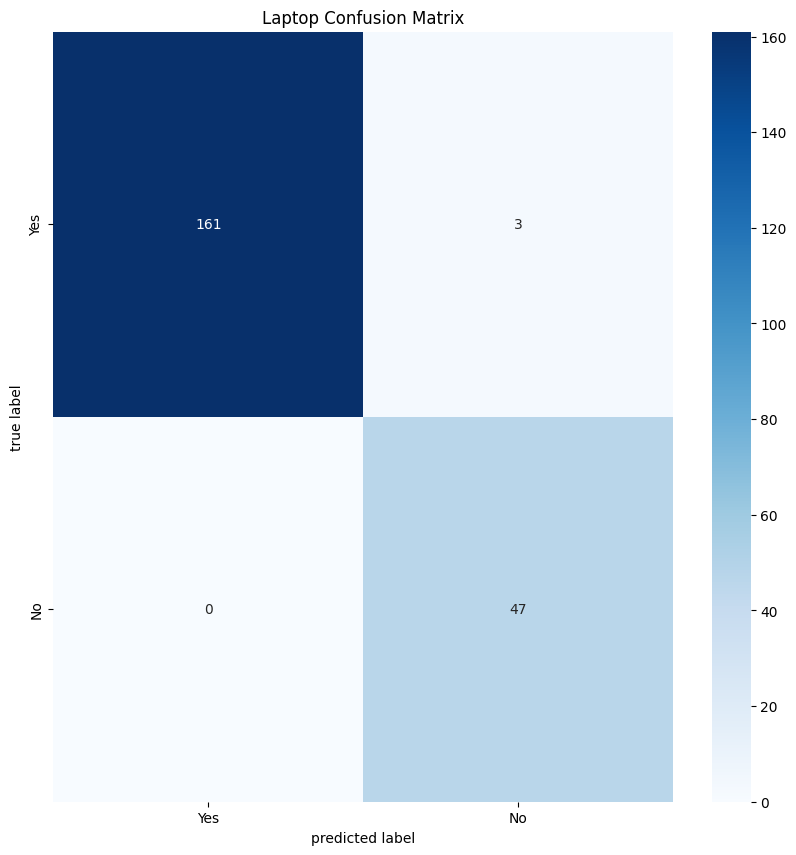

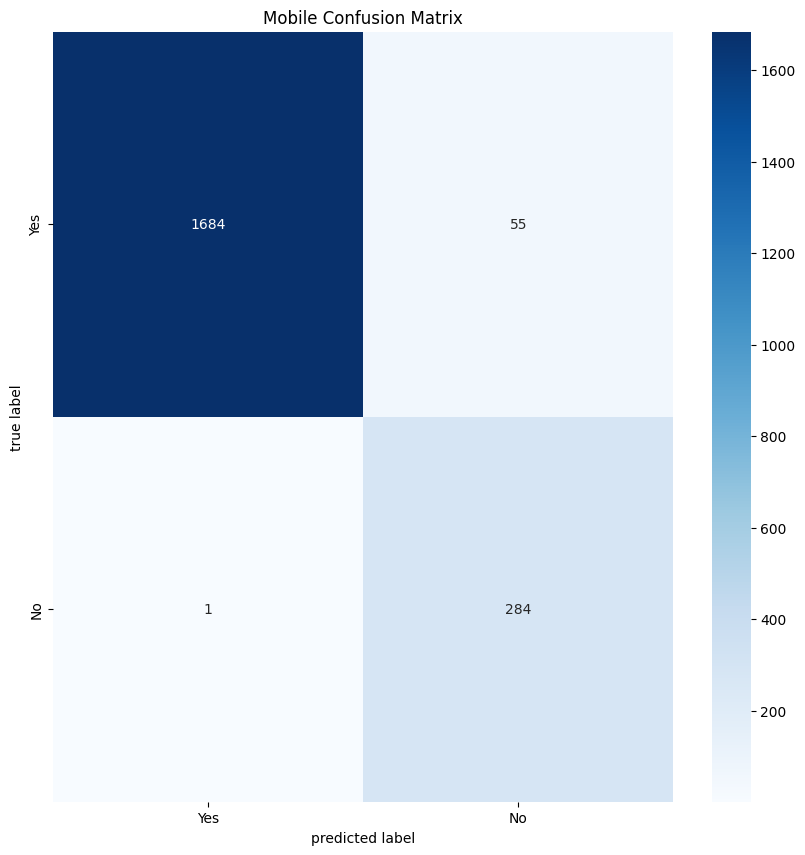

In [144]:
# confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
laptop_confusion=confusion_matrix(ypredict_laptop_model,y_test_laptop_target)
mobile_confusion=confusion_matrix(ypredict_mobile_model,y_test_mobile_target)

#using heatmap

def cm_matrix(con_matrix,title):
    plt.figure(figsize=(10,10))
    
    sns.heatmap(con_matrix,annot=True,fmt='d',xticklabels=['Yes','No'],yticklabels=['Yes','No'],cmap='Blues')
    plt.xlabel('predicted label')
    plt.ylabel('true label')
    plt.title(title)
    plt.show()

# laptop model confusion matrix
cm_matrix(laptop_confusion,'Laptop Confusion Matrix')

#mobile model confusion matrix
cm_matrix(mobile_confusion,'Mobile Confusion Matrix')


    

In [148]:
# BAR PLOT OF MODEL ACCURACY BETWEEN LAPTOP AND MOBILE
accuracy_score_laptop=accuracy_score(y_test_laptop_target,ypredict_laptop_model)
accuracy_score_mobile=accuracy_score(y_test_mobile_target,ypredict_mobile_model)

In [149]:
accuracy_score_laptop

0.985781990521327

In [150]:
accuracy_score_mobile

0.9723320158102767

C:\Users\BHARATH.V.P\AppData\Local\Temp\ipykernel_78252\1675657619.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=['Laptop_accuracy','Mobile_accuracy'],y=[accuracy_score_laptop,


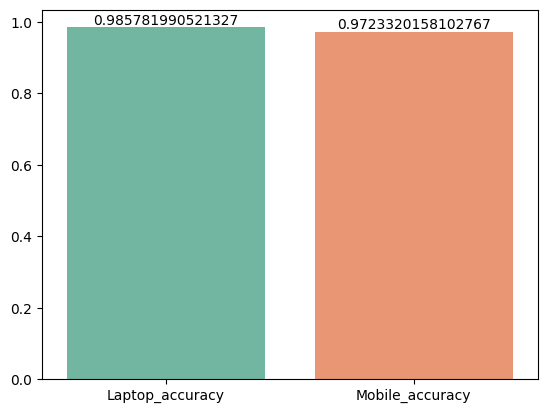

In [156]:
ax=sns.barplot(x=['Laptop_accuracy','Mobile_accuracy'],y=[accuracy_score_laptop,
                                                      accuracy_score_mobile],palette='Set2')
for p in ax.patches:
    ax.text(p.get_x()+p.get_width()/2,p.get_height(),p.get_height(),va='bottom',ha='center')

In [161]:
# classification report
from sklearn.metrics import classification_report
laptop_classification_report=classification_report(y_test_laptop_target,ypredict_laptop_model,output_dict=True)
mobile_classification_report=classification_report(y_test_mobile_target,ypredict_mobile_model,output_dict=True)
pd.DataFrame(laptop_classification_report)

,No,Yes,accuracy,macro avg,weighted avg
precision,0.981707,1.000000,0.985782,0.990854,0.986042
recall,1.000000,0.940000,0.985782,0.970000,0.985782
f1-score,0.990769,0.969072,0.985782,0.979921,0.985628
support,161.000000,50.000000,0.985782,211.000000,211.000000


In [162]:
laptop_results_Actual_predicted=pd.DataFrame({'Actual':y_test_laptop_target,
                                             'Predicted':ypredict_laptop_model})
mobile_results_Actual_predicted=pd.DataFrame({'Actual':y_test_mobile_target,
                                             'Predicted':ypredict_mobile_model})

In [166]:
laptop_results_Actual_predicted
mobile_results_Actual_predicted

,Actual,Predicted
11732,Yes,Yes
8831,No,No
8722,No,No
529,No,No
5322,No,No
...,...,...
1391,No,No
8102,Yes,Yes
10385,No,No
6235,No,No


In [165]:
mobile_results_Actual_predicted

,Actual,Predicted
11732,Yes,Yes
8831,No,No
8722,No,No
529,No,No
5322,No,No
...,...,...
1391,No,No
8102,Yes,Yes
10385,No,No
6235,No,No


In [167]:
y_test_laptop_target

6417      No
9665      No
7640      No
9905     Yes
8745     Yes
        ... 
11596     No
7851      No
7898      No
10215    Yes
10043    Yes
Name: Taken_product, Length: 211, dtype: object

In [173]:
# prediction probability
laptop_model=RandomForestClassifier()
laptop_model.fit(X_train_laptop_features,y_train_laptop_target)
laptop_prediction_prob=laptop_model.predict_proba(X_test_laptop_features)[:,1]

In [174]:
laptop_prediction_prob

array([0.15, 0.08, 0.01, 0.6 , 0.62, 0.59, 0.18, 0.01, 0.1 , 0.  , 0.03,
       0.03, 0.12, 0.51, 0.28, 0.  , 0.02, 0.03, 0.1 , 0.  , 0.06, 0.  ,
       0.01, 0.13, 0.19, 0.1 , 0.03, 0.01, 0.04, 0.06, 0.16, 0.04, 0.71,
       0.18, 0.02, 0.  , 0.05, 0.92, 0.1 , 0.02, 0.01, 0.65, 0.15, 0.01,
       0.3 , 0.17, 0.27, 0.64, 0.09, 0.09, 0.03, 0.14, 0.01, 0.  , 0.01,
       0.87, 0.07, 0.05, 0.01, 0.01, 0.66, 0.05, 0.  , 0.79, 0.3 , 0.08,
       0.55, 0.04, 0.79, 0.88, 0.02, 0.67, 0.77, 0.72, 0.04, 0.1 , 0.09,
       0.  , 0.05, 0.07, 0.7 , 0.01, 0.03, 0.04, 0.66, 0.33, 0.4 , 0.32,
       0.05, 0.02, 0.26, 0.07, 0.04, 0.03, 0.87, 0.67, 0.01, 0.62, 0.  ,
       0.54, 0.  , 0.04, 0.02, 0.  , 0.05, 0.7 , 0.49, 0.04, 0.01, 0.78,
       0.03, 0.69, 0.72, 0.1 , 0.01, 0.06, 0.47, 0.27, 0.14, 0.05, 0.74,
       0.03, 0.13, 0.14, 0.08, 0.12, 0.05, 0.1 , 0.07, 0.15, 0.07, 0.05,
       0.68, 0.  , 0.04, 0.  , 0.01, 0.11, 0.7 , 0.06, 0.01, 0.9 , 0.14,
       0.05, 0.97, 0.03, 0.1 , 0.01, 0.1 , 0.5 , 0.

In [175]:
# prediction probability
mobile_model=RandomForestClassifier()
mobile_model.fit(X_train_mobile_features,y_train_mobile_target)
mobile_prediction_prob=mobile_model.predict_proba(X_test_mobile_features)[:,1]

In [176]:
mobile_prediction_prob

array([0.65, 0.11, 0.  , ..., 0.  , 0.01, 0.  ])

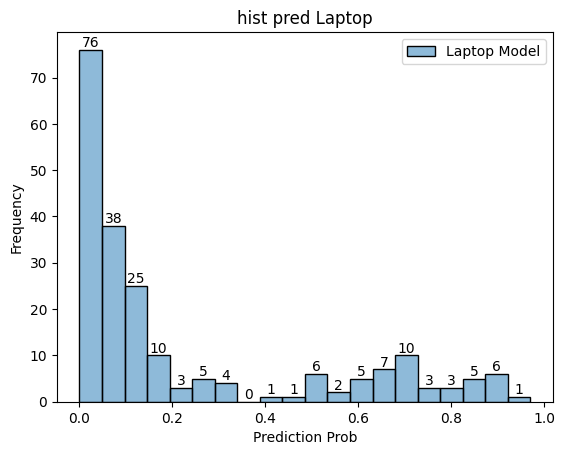

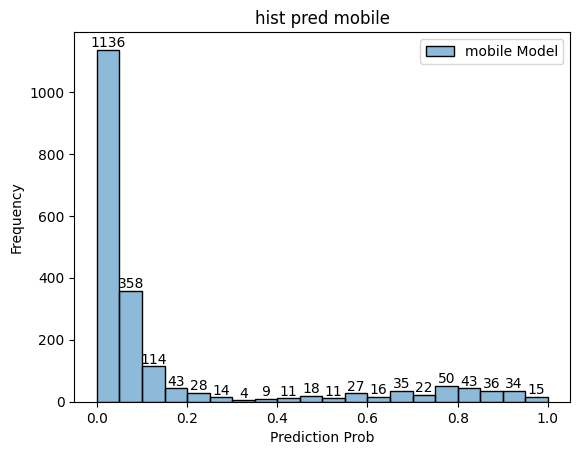

In [181]:
ax=sns.histplot(laptop_prediction_prob,bins=20,alpha=0.5,label='Laptop Model')
plt.xlabel('Prediction Prob')
plt.ylabel('Frequency')
plt.title('hist pred Laptop')

for p in ax.patches:
    ax.text(p.get_x()+p.get_width()/2,p.get_height(),p.get_height(),va='bottom',ha='center')

plt.legend()
plt.show()


ax=sns.histplot(mobile_prediction_prob,bins=20,alpha=0.5,label='mobile Model')
plt.xlabel('Prediction Prob')
plt.ylabel('Frequency')
plt.title('hist pred mobile')

for p in ax.patches:
    ax.text(p.get_x()+p.get_width()/2,p.get_height(),p.get_height(),va='bottom',ha='center')


plt.legend()
plt.show()


In [ ]:
# plots


C:\Users\BHARATH.V.P\AppData\Local\Temp\ipykernel_78252\3892849363.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=data,x='preferred_device',palette='Set2')


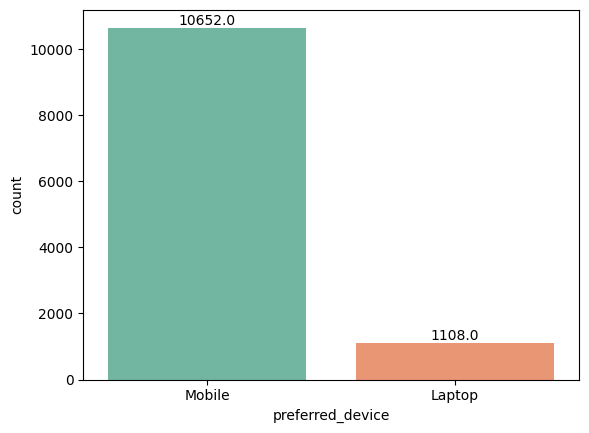

In [214]:
#count plot of mobiles to laptop

ax=sns.countplot(data=data,x='preferred_device',palette='Set2')
for p in ax.patches:
    ax.text(p.get_x()+p.get_width()/2,p.get_height(),p.get_height(),va='bottom',ha='center')

<Axes: xlabel='Yearly_avg_view_on_travel_page', ylabel='total_likes_on_outstation_checkin_given'>

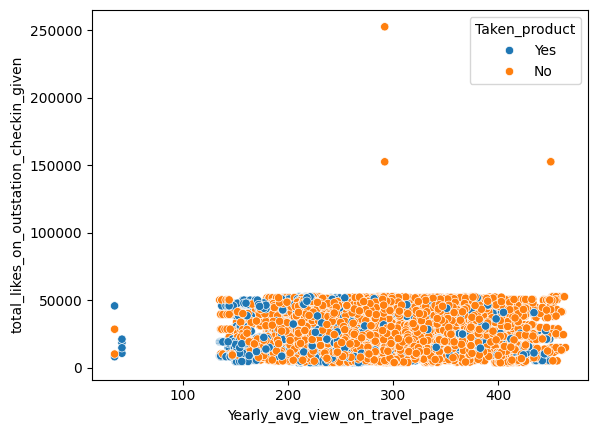

In [218]:
sns.scatterplot(data=data,x='Yearly_avg_view_on_travel_page', y='total_likes_on_outstation_checkin_given'
               ,hue='Taken_product')

In [215]:
data.columns

Index(['Taken_product', 'Yearly_avg_view_on_travel_page', 'preferred_device',
       'total_likes_on_outstation_checkin_given',
       'yearly_avg_Outstation_checkins', 'member_in_family',
       'preferred_location_type', 'Yearly_avg_comment_on_travel_page',
       'total_likes_on_outofstation_checkin_received',
       'week_since_last_outstation_checkin', 'following_company_page',
       'montly_avg_comment_on_company_page', 'working_flag',
       'travelling_network_rating', 'Adult_flag',
       'Daily_Avg_mins_spend_on_traveling_page'],
      dtype='object')

<Axes: xlabel='preferred_location_type', ylabel='count'>

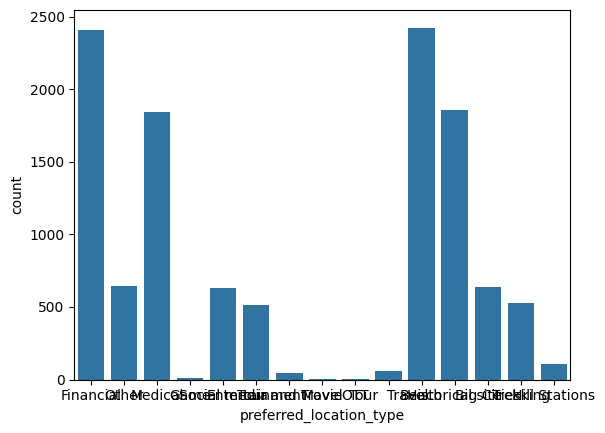

In [219]:
#countplot preferred location type
sns.countplot(data=data,x='preferred_location_type')

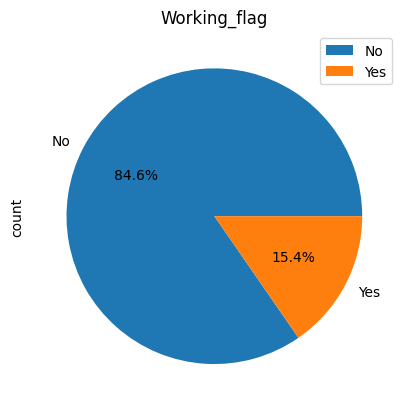

In [224]:
# pie chart
data.working_flag.value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('Working_flag')
plt.legend()